# VAE

### VAE

In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
!pip uninstall torch

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.11/dist-packages/functorch/*
    /usr/local/lib/python3.11/dist-packages/torch-2.5.1+cu124.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torch/*
    /usr/local/lib/python3.11/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.5.1+cu124


In [7]:
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 2.1 MB/s eta 0:00:00


In [1]:
import torch
print(torch.__version__)

2.5.1+cu124


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm

In [3]:
DEVICE = "cuda"

In [4]:
class Encoder(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=20):
        super(Encoder, self).__init__()
        self.hidden_layer = nn.Linear(input_dim, hidden_dim)
        self.out_mean = nn.Linear(hidden_dim, latent_dim)
        self.out_disp = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        x = F.relu(self.hidden_layer(x))
        mu = self.out_mean(x)
        logvar = self.out_disp(x)
        return mu, logvar

In [5]:
class Decoder(nn.Module):
    def __init__(self, latent_dim=20, hidden_dim=400, output_dim=784):
        super(Decoder, self).__init__()
        self.hidden_layer = nn.Linear(latent_dim, hidden_dim)
        self.out_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        hidden = F.relu(self.hidden_layer(z))
        x_recon = torch.sigmoid(self.out_layer(hidden))
        return x_recon

In [6]:
class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=20):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def reparameterize(self, mu, logvar):
        std =  torch.exp(0.5 * logvar)
        epsilon = torch.rand_like(logvar).to(DEVICE)
        z = mu + std * epsilon
        return z

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

In [7]:
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KL = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KL

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Разворачиваем изображение в вектор
])

mnist_train = dset.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(mnist_train, batch_size=128, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.75MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.9MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
hidden_dim = 400 # размерность скрытого слоя
latent_dim = 20 # размерность латентного пространства

# Инициализируйте модель VAE, оптимизатор и устройство настройки
device = torch.device(DEVICE)
model = VAE(input_dim=784, hidden_dim=hidden_dim, latent_dim=latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [10]:
num_epochs = 50 # Для получения более презентабельного результата используйте 50 и больше эпох
model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(DEVICE)
        optimizer.zero_grad()

        x_recon, mean, log_var = model(data)
        loss = loss_function(x_recon, data, mean, log_var)

        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}')
    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

Epoch: 0 [0/60000 (0%)]	Loss: 543.709229
Epoch: 0 [12800/60000 (21%)]	Loss: 154.441742
Epoch: 0 [25600/60000 (43%)]	Loss: 132.006561
Epoch: 0 [38400/60000 (64%)]	Loss: 119.529846
Epoch: 0 [51200/60000 (85%)]	Loss: 104.652191
====> Epoch: 0 Average loss: 143.6712
Epoch: 1 [0/60000 (0%)]	Loss: 109.398300
Epoch: 1 [12800/60000 (21%)]	Loss: 102.492706
Epoch: 1 [25600/60000 (43%)]	Loss: 98.730553
Epoch: 1 [38400/60000 (64%)]	Loss: 101.090103
Epoch: 1 [51200/60000 (85%)]	Loss: 99.631737
====> Epoch: 1 Average loss: 101.4749
Epoch: 2 [0/60000 (0%)]	Loss: 96.123764
Epoch: 2 [12800/60000 (21%)]	Loss: 98.260620
Epoch: 2 [25600/60000 (43%)]	Loss: 94.932816
Epoch: 2 [38400/60000 (64%)]	Loss: 95.398529
Epoch: 2 [51200/60000 (85%)]	Loss: 100.114174
====> Epoch: 2 Average loss: 95.9894
Epoch: 3 [0/60000 (0%)]	Loss: 92.300087
Epoch: 3 [12800/60000 (21%)]	Loss: 90.882607
Epoch: 3 [25600/60000 (43%)]	Loss: 87.792160
Epoch: 3 [38400/60000 (64%)]	Loss: 90.730591
Epoch: 3 [51200/60000 (85%)]	Loss: 89.14135

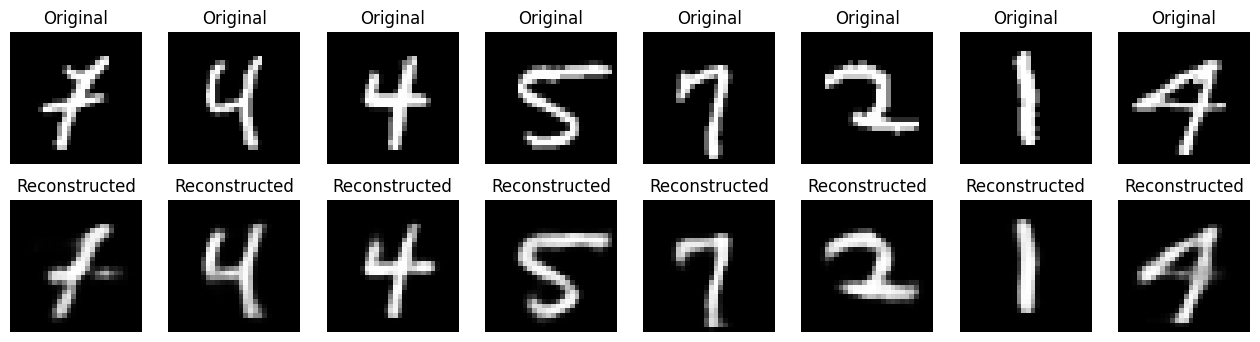

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Сплющите изображение (28x28 -> 784)
])

# Загрузите тестовый набор данных MNIST
mnist_test = dset.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=16, shuffle=True)

model.eval()  # Переведите модель в режим оценки

# ---- Визуализация: Реконструкция тестовых изображений ----
# Получите партию тестовых изображений
data_iter = iter(test_loader)
images, _ = next(data_iter)
images = images.to(device)

with torch.no_grad():
    recon_images, mu, logvar = model(images)

# Функция построения графика исходного и реконструированного изображений
def plot_images(original, reconstructed, n=8):
    plt.figure(figsize=(16, 4))
    for i in range(n):
        # Оригинальные изображения
        plt.subplot(2, n, i+1)
        plt.imshow(original[i].cpu().view(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis("off")
        # Реконструированные изображения
        plt.subplot(2, n, i+n+1)
        plt.imshow(reconstructed[i].cpu().view(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

plot_images(images, recon_images, n=8)

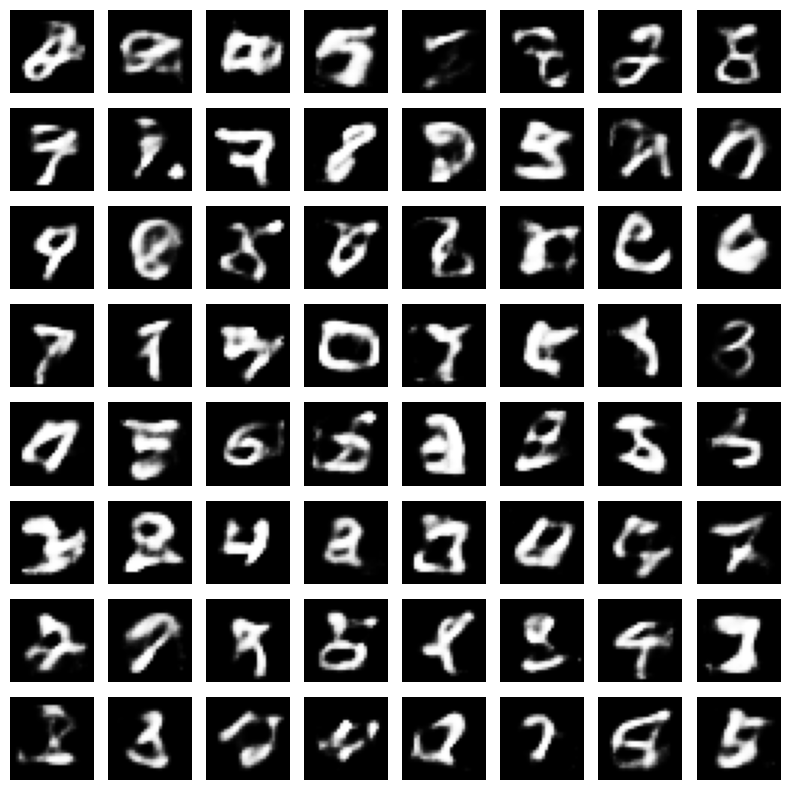

In [12]:
with torch.no_grad():
    # Выборка латентных векторов z из стандартного нормального распределения
    z = torch.randn(64, latent_dim)
    generated_images = model.decoder(z.to(DEVICE))

def plot_generated(images):
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        img = images[i].view(28,28).cpu().numpy()
        ax.imshow(img, cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plot_generated(generated_images)

### Conditional VAE

In [13]:
class ConditionalEncoder(nn.Module):
    def __init__(self, input_dim=784, condition_dim=10, hidden_dim=400, latent_dim=20):
        super(ConditionalEncoder, self).__init__()
        self.hidden_layer = nn.Linear(input_dim + condition_dim, hidden_dim)
        self.out_mean = nn.Linear(hidden_dim, latent_dim)
        self.out_disp = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x, c):
        x = torch.cat([x, c], 1)
        x = F.relu(self.hidden_layer(x))
        mu = self.out_mean(x)
        logvar = self.out_disp(x)
        return mu, logvar

In [14]:
class ConditionalDecoder(nn.Module):
    def __init__(self, latent_dim=20, condition_dim=10, hidden_dim=400, output_dim=784):
        super(ConditionalDecoder, self).__init__()
        self.hidden_layer = nn.Linear(latent_dim + condition_dim, hidden_dim)
        self.out_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, z, c):
        z = torch.cat([z, c], 1)
        hidden = F.relu(self.hidden_layer(z))
        x_recon = torch.sigmoid(self.out_layer(hidden))
        return x_recon

In [15]:
class ConditionalVAE(nn.Module):
    def __init__(self, input_dim=784, condition_dim=10, hidden_dim=400, latent_dim=50):
        super(ConditionalVAE, self).__init__()
        self.encoder = ConditionalEncoder(input_dim, condition_dim, hidden_dim, latent_dim)
        self.decoder = ConditionalDecoder(latent_dim, condition_dim, hidden_dim, input_dim)

    def reparameterize(self, mu, logvar):
        std =  torch.exp(0.5 * logvar)
        epsilon = torch.rand_like(logvar).to(DEVICE)
        z = mu + std * epsilon
        return z

    def forward(self, x, c):
        mu, logvar = self.encoder(x, c)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z, c)
        return x_recon, mu, logvar

In [16]:
batch_size = 128
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = dset.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = dset.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
hidden_dim = 400 # размерность скрытого слоя
latent_dim = 20 # размерность латентного пространства

model = ConditionalVAE(input_dim=784, condition_dim=10, hidden_dim=hidden_dim, latent_dim=latent_dim).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [18]:
num_epochs = 50 # Для получения более презентабельного результата используйте 50 и больше эпох
model.train()
for epoch in tqdm(range(1, num_epochs + 1)):
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        ## YOUR CODE HERE
        ## TODO: Переместите входные данные (data) на правильное устройство
        ## TODO: Перенесите метки классов (labels) на правильное устройство
        ## TODO: С помощью функции F.one_hot получите массив векторов - закодированных меток классов для вашего батча
        ## TODO: Обнулите градиенты
        ## TODO: Вычислите выходы энкодера (recon_batch, mu, logvar)
        ## TODO: Рассчитайте функцию потерь (loss)
        ## TODO: Выполните обратное распространение градиентов с учетом функции потерь
        ## TODO: Обновите общий loss, добавив текущий loss
        ## TODO: Выполните шаг оптимизатора
        labels = labels.to(DEVICE)
        data = data.to(DEVICE)
        conditions = F.one_hot(labels, 10)

        optimizer.zero_grad()

        x_recon, mean, log_var = model(data, conditions)
        loss = loss_function(x_recon, data, mean, log_var)

        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}')
    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 [0/60000 (0%)]	Loss: 544.122131
Epoch: 1 [12800/60000 (21%)]	Loss: 161.864761
Epoch: 1 [25600/60000 (43%)]	Loss: 121.481445
Epoch: 1 [38400/60000 (64%)]	Loss: 115.687958
Epoch: 1 [51200/60000 (85%)]	Loss: 114.251251


  2%|▏         | 1/50 [00:07<05:45,  7.05s/it]

====> Epoch: 1 Average loss: 143.7911
Epoch: 2 [0/60000 (0%)]	Loss: 107.168327
Epoch: 2 [12800/60000 (21%)]	Loss: 105.099518
Epoch: 2 [25600/60000 (43%)]	Loss: 101.943779
Epoch: 2 [38400/60000 (64%)]	Loss: 100.450851
Epoch: 2 [51200/60000 (85%)]	Loss: 96.789383


  4%|▍         | 2/50 [00:13<05:29,  6.87s/it]

====> Epoch: 2 Average loss: 101.8669
Epoch: 3 [0/60000 (0%)]	Loss: 101.167717
Epoch: 3 [12800/60000 (21%)]	Loss: 95.830048
Epoch: 3 [25600/60000 (43%)]	Loss: 96.009064
Epoch: 3 [38400/60000 (64%)]	Loss: 97.563385
Epoch: 3 [51200/60000 (85%)]	Loss: 96.460358


  6%|▌         | 3/50 [00:20<05:29,  7.02s/it]

====> Epoch: 3 Average loss: 95.2553
Epoch: 4 [0/60000 (0%)]	Loss: 93.781639
Epoch: 4 [12800/60000 (21%)]	Loss: 92.057922
Epoch: 4 [25600/60000 (43%)]	Loss: 94.809258
Epoch: 4 [38400/60000 (64%)]	Loss: 93.741852
Epoch: 4 [51200/60000 (85%)]	Loss: 93.468719


  8%|▊         | 4/50 [00:27<05:15,  6.85s/it]

====> Epoch: 4 Average loss: 92.0898
Epoch: 5 [0/60000 (0%)]	Loss: 88.751869
Epoch: 5 [12800/60000 (21%)]	Loss: 94.496323
Epoch: 5 [25600/60000 (43%)]	Loss: 91.806099
Epoch: 5 [38400/60000 (64%)]	Loss: 90.052582
Epoch: 5 [51200/60000 (85%)]	Loss: 89.941742


 10%|█         | 5/50 [00:34<05:14,  6.99s/it]

====> Epoch: 5 Average loss: 89.9317
Epoch: 6 [0/60000 (0%)]	Loss: 91.433914
Epoch: 6 [12800/60000 (21%)]	Loss: 89.649132
Epoch: 6 [25600/60000 (43%)]	Loss: 89.824043
Epoch: 6 [38400/60000 (64%)]	Loss: 85.576385
Epoch: 6 [51200/60000 (85%)]	Loss: 87.407799


 12%|█▏        | 6/50 [00:41<05:01,  6.86s/it]

====> Epoch: 6 Average loss: 88.2973
Epoch: 7 [0/60000 (0%)]	Loss: 90.495384
Epoch: 7 [12800/60000 (21%)]	Loss: 89.883125
Epoch: 7 [25600/60000 (43%)]	Loss: 87.351425
Epoch: 7 [38400/60000 (64%)]	Loss: 85.009064
Epoch: 7 [51200/60000 (85%)]	Loss: 86.842667


 14%|█▍        | 7/50 [00:48<04:58,  6.95s/it]

====> Epoch: 7 Average loss: 87.0865
Epoch: 8 [0/60000 (0%)]	Loss: 86.456291
Epoch: 8 [12800/60000 (21%)]	Loss: 81.586113
Epoch: 8 [25600/60000 (43%)]	Loss: 84.827461
Epoch: 8 [38400/60000 (64%)]	Loss: 86.482246
Epoch: 8 [51200/60000 (85%)]	Loss: 86.905029


 16%|█▌        | 8/50 [00:55<04:55,  7.04s/it]

====> Epoch: 8 Average loss: 86.1751
Epoch: 9 [0/60000 (0%)]	Loss: 85.151703
Epoch: 9 [12800/60000 (21%)]	Loss: 86.498413
Epoch: 9 [25600/60000 (43%)]	Loss: 83.220932
Epoch: 9 [38400/60000 (64%)]	Loss: 85.860901
Epoch: 9 [51200/60000 (85%)]	Loss: 87.084999


 18%|█▊        | 9/50 [01:02<04:44,  6.94s/it]

====> Epoch: 9 Average loss: 85.4251
Epoch: 10 [0/60000 (0%)]	Loss: 80.602242
Epoch: 10 [12800/60000 (21%)]	Loss: 80.798477
Epoch: 10 [25600/60000 (43%)]	Loss: 85.828857
Epoch: 10 [38400/60000 (64%)]	Loss: 83.865608
Epoch: 10 [51200/60000 (85%)]	Loss: 88.011337


 20%|██        | 10/50 [01:09<04:43,  7.09s/it]

====> Epoch: 10 Average loss: 84.8138
Epoch: 11 [0/60000 (0%)]	Loss: 83.175400
Epoch: 11 [12800/60000 (21%)]	Loss: 82.911751
Epoch: 11 [25600/60000 (43%)]	Loss: 83.714157
Epoch: 11 [38400/60000 (64%)]	Loss: 83.341446
Epoch: 11 [51200/60000 (85%)]	Loss: 87.171761


 22%|██▏       | 11/50 [01:16<04:31,  6.97s/it]

====> Epoch: 11 Average loss: 84.2975
Epoch: 12 [0/60000 (0%)]	Loss: 83.146759
Epoch: 12 [12800/60000 (21%)]	Loss: 82.067261
Epoch: 12 [25600/60000 (43%)]	Loss: 84.934357
Epoch: 12 [38400/60000 (64%)]	Loss: 84.994125
Epoch: 12 [51200/60000 (85%)]	Loss: 79.851517


 24%|██▍       | 12/50 [01:23<04:27,  7.04s/it]

====> Epoch: 12 Average loss: 83.8214
Epoch: 13 [0/60000 (0%)]	Loss: 85.548752
Epoch: 13 [12800/60000 (21%)]	Loss: 84.953850
Epoch: 13 [25600/60000 (43%)]	Loss: 84.054276
Epoch: 13 [38400/60000 (64%)]	Loss: 83.416397
Epoch: 13 [51200/60000 (85%)]	Loss: 83.560081


 26%|██▌       | 13/50 [01:31<04:23,  7.11s/it]

====> Epoch: 13 Average loss: 83.4626
Epoch: 14 [0/60000 (0%)]	Loss: 82.339531
Epoch: 14 [12800/60000 (21%)]	Loss: 85.465225
Epoch: 14 [25600/60000 (43%)]	Loss: 80.705185
Epoch: 14 [38400/60000 (64%)]	Loss: 85.050613
Epoch: 14 [51200/60000 (85%)]	Loss: 80.184967


 28%|██▊       | 14/50 [01:37<04:10,  6.97s/it]

====> Epoch: 14 Average loss: 83.1392
Epoch: 15 [0/60000 (0%)]	Loss: 81.156937
Epoch: 15 [12800/60000 (21%)]	Loss: 77.064087
Epoch: 15 [25600/60000 (43%)]	Loss: 84.498138
Epoch: 15 [38400/60000 (64%)]	Loss: 81.214935
Epoch: 15 [51200/60000 (85%)]	Loss: 82.520592


 30%|███       | 15/50 [01:45<04:07,  7.08s/it]

====> Epoch: 15 Average loss: 82.8698
Epoch: 16 [0/60000 (0%)]	Loss: 81.404747
Epoch: 16 [12800/60000 (21%)]	Loss: 81.866463
Epoch: 16 [25600/60000 (43%)]	Loss: 85.030586
Epoch: 16 [38400/60000 (64%)]	Loss: 84.146423
Epoch: 16 [51200/60000 (85%)]	Loss: 81.440269


 32%|███▏      | 16/50 [01:51<03:55,  6.93s/it]

====> Epoch: 16 Average loss: 82.6206
Epoch: 17 [0/60000 (0%)]	Loss: 83.303360
Epoch: 17 [12800/60000 (21%)]	Loss: 81.495697
Epoch: 17 [25600/60000 (43%)]	Loss: 81.862862
Epoch: 17 [38400/60000 (64%)]	Loss: 78.686386
Epoch: 17 [51200/60000 (85%)]	Loss: 84.028145


 34%|███▍      | 17/50 [01:58<03:51,  7.03s/it]

====> Epoch: 17 Average loss: 82.3894
Epoch: 18 [0/60000 (0%)]	Loss: 82.865509
Epoch: 18 [12800/60000 (21%)]	Loss: 83.084702
Epoch: 18 [25600/60000 (43%)]	Loss: 83.884125
Epoch: 18 [38400/60000 (64%)]	Loss: 81.442787
Epoch: 18 [51200/60000 (85%)]	Loss: 82.884094


 36%|███▌      | 18/50 [02:05<03:43,  6.98s/it]

====> Epoch: 18 Average loss: 82.1505
Epoch: 19 [0/60000 (0%)]	Loss: 78.990776
Epoch: 19 [12800/60000 (21%)]	Loss: 82.551971
Epoch: 19 [25600/60000 (43%)]	Loss: 83.945328
Epoch: 19 [38400/60000 (64%)]	Loss: 86.051247
Epoch: 19 [51200/60000 (85%)]	Loss: 84.733376


 38%|███▊      | 19/50 [02:12<03:37,  7.00s/it]

====> Epoch: 19 Average loss: 81.9570
Epoch: 20 [0/60000 (0%)]	Loss: 77.330978
Epoch: 20 [12800/60000 (21%)]	Loss: 80.340874
Epoch: 20 [25600/60000 (43%)]	Loss: 84.101311
Epoch: 20 [38400/60000 (64%)]	Loss: 85.320442
Epoch: 20 [51200/60000 (85%)]	Loss: 82.436470


 40%|████      | 20/50 [02:20<03:32,  7.09s/it]

====> Epoch: 20 Average loss: 81.8216
Epoch: 21 [0/60000 (0%)]	Loss: 83.858223
Epoch: 21 [12800/60000 (21%)]	Loss: 81.123077
Epoch: 21 [25600/60000 (43%)]	Loss: 79.695633
Epoch: 21 [38400/60000 (64%)]	Loss: 82.449570
Epoch: 21 [51200/60000 (85%)]	Loss: 83.129608


 42%|████▏     | 21/50 [02:26<03:21,  6.94s/it]

====> Epoch: 21 Average loss: 81.6509
Epoch: 22 [0/60000 (0%)]	Loss: 82.873596
Epoch: 22 [12800/60000 (21%)]	Loss: 80.885147
Epoch: 22 [25600/60000 (43%)]	Loss: 83.860130
Epoch: 22 [38400/60000 (64%)]	Loss: 81.990501
Epoch: 22 [51200/60000 (85%)]	Loss: 81.185570


 44%|████▍     | 22/50 [02:34<03:17,  7.04s/it]

====> Epoch: 22 Average loss: 81.4829
Epoch: 23 [0/60000 (0%)]	Loss: 80.825272
Epoch: 23 [12800/60000 (21%)]	Loss: 80.307549
Epoch: 23 [25600/60000 (43%)]	Loss: 84.317261
Epoch: 23 [38400/60000 (64%)]	Loss: 81.129875
Epoch: 23 [51200/60000 (85%)]	Loss: 81.404724


 46%|████▌     | 23/50 [02:40<03:06,  6.92s/it]

====> Epoch: 23 Average loss: 81.3872
Epoch: 24 [0/60000 (0%)]	Loss: 80.675133
Epoch: 24 [12800/60000 (21%)]	Loss: 81.954742
Epoch: 24 [25600/60000 (43%)]	Loss: 81.920937
Epoch: 24 [38400/60000 (64%)]	Loss: 84.033798
Epoch: 24 [51200/60000 (85%)]	Loss: 78.887344


 48%|████▊     | 24/50 [02:47<03:02,  7.03s/it]

====> Epoch: 24 Average loss: 81.2742
Epoch: 25 [0/60000 (0%)]	Loss: 80.561325
Epoch: 25 [12800/60000 (21%)]	Loss: 81.700256
Epoch: 25 [25600/60000 (43%)]	Loss: 79.803261
Epoch: 25 [38400/60000 (64%)]	Loss: 81.787697
Epoch: 25 [51200/60000 (85%)]	Loss: 80.689163


 50%|█████     | 25/50 [02:55<02:57,  7.10s/it]

====> Epoch: 25 Average loss: 81.1260
Epoch: 26 [0/60000 (0%)]	Loss: 77.938301
Epoch: 26 [12800/60000 (21%)]	Loss: 85.482422
Epoch: 26 [25600/60000 (43%)]	Loss: 83.754662
Epoch: 26 [38400/60000 (64%)]	Loss: 82.949883
Epoch: 26 [51200/60000 (85%)]	Loss: 79.149811


 52%|█████▏    | 26/50 [03:01<02:47,  6.96s/it]

====> Epoch: 26 Average loss: 81.0354
Epoch: 27 [0/60000 (0%)]	Loss: 80.422707
Epoch: 27 [12800/60000 (21%)]	Loss: 79.211853
Epoch: 27 [25600/60000 (43%)]	Loss: 79.903015
Epoch: 27 [38400/60000 (64%)]	Loss: 79.232315
Epoch: 27 [51200/60000 (85%)]	Loss: 79.866989


 54%|█████▍    | 27/50 [03:09<02:41,  7.02s/it]

====> Epoch: 27 Average loss: 80.9359
Epoch: 28 [0/60000 (0%)]	Loss: 79.047180
Epoch: 28 [12800/60000 (21%)]	Loss: 78.279633
Epoch: 28 [25600/60000 (43%)]	Loss: 79.710037
Epoch: 28 [38400/60000 (64%)]	Loss: 81.620781
Epoch: 28 [51200/60000 (85%)]	Loss: 81.532608


 56%|█████▌    | 28/50 [03:15<02:31,  6.88s/it]

====> Epoch: 28 Average loss: 80.8259
Epoch: 29 [0/60000 (0%)]	Loss: 79.972580
Epoch: 29 [12800/60000 (21%)]	Loss: 79.240273
Epoch: 29 [25600/60000 (43%)]	Loss: 79.785423
Epoch: 29 [38400/60000 (64%)]	Loss: 80.139557
Epoch: 29 [51200/60000 (85%)]	Loss: 83.619530


 58%|█████▊    | 29/50 [03:22<02:26,  6.96s/it]

====> Epoch: 29 Average loss: 80.7086
Epoch: 30 [0/60000 (0%)]	Loss: 80.202042
Epoch: 30 [12800/60000 (21%)]	Loss: 81.711586
Epoch: 30 [25600/60000 (43%)]	Loss: 80.676376
Epoch: 30 [38400/60000 (64%)]	Loss: 80.773041
Epoch: 30 [51200/60000 (85%)]	Loss: 83.502617


 60%|██████    | 30/50 [03:29<02:18,  6.92s/it]

====> Epoch: 30 Average loss: 80.6254
Epoch: 31 [0/60000 (0%)]	Loss: 80.545876
Epoch: 31 [12800/60000 (21%)]	Loss: 79.688873
Epoch: 31 [25600/60000 (43%)]	Loss: 78.654129
Epoch: 31 [38400/60000 (64%)]	Loss: 79.546539
Epoch: 31 [51200/60000 (85%)]	Loss: 79.851105


 62%|██████▏   | 31/50 [03:36<02:11,  6.92s/it]

====> Epoch: 31 Average loss: 80.5554
Epoch: 32 [0/60000 (0%)]	Loss: 79.887589
Epoch: 32 [12800/60000 (21%)]	Loss: 79.066071
Epoch: 32 [25600/60000 (43%)]	Loss: 80.460953
Epoch: 32 [38400/60000 (64%)]	Loss: 84.265701
Epoch: 32 [51200/60000 (85%)]	Loss: 79.772102


 64%|██████▍   | 32/50 [03:43<02:05,  6.99s/it]

====> Epoch: 32 Average loss: 80.4651
Epoch: 33 [0/60000 (0%)]	Loss: 77.987923
Epoch: 33 [12800/60000 (21%)]	Loss: 75.128654
Epoch: 33 [25600/60000 (43%)]	Loss: 83.585907
Epoch: 33 [38400/60000 (64%)]	Loss: 77.680473
Epoch: 33 [51200/60000 (85%)]	Loss: 80.355362


 66%|██████▌   | 33/50 [03:50<01:56,  6.87s/it]

====> Epoch: 33 Average loss: 80.4073
Epoch: 34 [0/60000 (0%)]	Loss: 80.763649
Epoch: 34 [12800/60000 (21%)]	Loss: 80.442894
Epoch: 34 [25600/60000 (43%)]	Loss: 79.901978
Epoch: 34 [38400/60000 (64%)]	Loss: 84.318985
Epoch: 34 [51200/60000 (85%)]	Loss: 81.882828


 68%|██████▊   | 34/50 [03:57<01:52,  7.00s/it]

====> Epoch: 34 Average loss: 80.3301
Epoch: 35 [0/60000 (0%)]	Loss: 82.135399
Epoch: 35 [12800/60000 (21%)]	Loss: 82.763519
Epoch: 35 [25600/60000 (43%)]	Loss: 77.766899
Epoch: 35 [38400/60000 (64%)]	Loss: 81.486595
Epoch: 35 [51200/60000 (85%)]	Loss: 78.896225


 70%|███████   | 35/50 [04:04<01:43,  6.89s/it]

====> Epoch: 35 Average loss: 80.2930
Epoch: 36 [0/60000 (0%)]	Loss: 77.176567
Epoch: 36 [12800/60000 (21%)]	Loss: 82.485718
Epoch: 36 [25600/60000 (43%)]	Loss: 79.675232
Epoch: 36 [38400/60000 (64%)]	Loss: 75.769730
Epoch: 36 [51200/60000 (85%)]	Loss: 77.957588


 72%|███████▏  | 36/50 [04:11<01:37,  6.99s/it]

====> Epoch: 36 Average loss: 80.1847
Epoch: 37 [0/60000 (0%)]	Loss: 82.930000
Epoch: 37 [12800/60000 (21%)]	Loss: 76.070885
Epoch: 37 [25600/60000 (43%)]	Loss: 80.460876
Epoch: 37 [38400/60000 (64%)]	Loss: 79.324455
Epoch: 37 [51200/60000 (85%)]	Loss: 83.214706


 74%|███████▍  | 37/50 [04:18<01:31,  7.07s/it]

====> Epoch: 37 Average loss: 80.1390
Epoch: 38 [0/60000 (0%)]	Loss: 78.332054
Epoch: 38 [12800/60000 (21%)]	Loss: 84.004974
Epoch: 38 [25600/60000 (43%)]	Loss: 81.857033
Epoch: 38 [38400/60000 (64%)]	Loss: 79.951096
Epoch: 38 [51200/60000 (85%)]	Loss: 77.920998


 76%|███████▌  | 38/50 [04:25<01:23,  6.94s/it]

====> Epoch: 38 Average loss: 80.0861
Epoch: 39 [0/60000 (0%)]	Loss: 79.301262
Epoch: 39 [12800/60000 (21%)]	Loss: 83.911224
Epoch: 39 [25600/60000 (43%)]	Loss: 76.036781
Epoch: 39 [38400/60000 (64%)]	Loss: 82.295555
Epoch: 39 [51200/60000 (85%)]	Loss: 80.468880


 78%|███████▊  | 39/50 [04:32<01:17,  7.04s/it]

====> Epoch: 39 Average loss: 80.0366
Epoch: 40 [0/60000 (0%)]	Loss: 81.674873
Epoch: 40 [12800/60000 (21%)]	Loss: 77.096306
Epoch: 40 [25600/60000 (43%)]	Loss: 79.221237
Epoch: 40 [38400/60000 (64%)]	Loss: 80.732300
Epoch: 40 [51200/60000 (85%)]	Loss: 77.733292


 80%|████████  | 40/50 [04:39<01:09,  6.92s/it]

====> Epoch: 40 Average loss: 79.9510
Epoch: 41 [0/60000 (0%)]	Loss: 80.064362
Epoch: 41 [12800/60000 (21%)]	Loss: 80.082748
Epoch: 41 [25600/60000 (43%)]	Loss: 79.675888
Epoch: 41 [38400/60000 (64%)]	Loss: 77.672852
Epoch: 41 [51200/60000 (85%)]	Loss: 81.424637


 82%|████████▏ | 41/50 [04:46<01:03,  7.01s/it]

====> Epoch: 41 Average loss: 79.9280
Epoch: 42 [0/60000 (0%)]	Loss: 82.515404
Epoch: 42 [12800/60000 (21%)]	Loss: 79.287987
Epoch: 42 [25600/60000 (43%)]	Loss: 77.499886
Epoch: 42 [38400/60000 (64%)]	Loss: 78.996605
Epoch: 42 [51200/60000 (85%)]	Loss: 78.027222


 84%|████████▍ | 42/50 [04:53<00:55,  6.97s/it]

====> Epoch: 42 Average loss: 79.8541
Epoch: 43 [0/60000 (0%)]	Loss: 79.898521
Epoch: 43 [12800/60000 (21%)]	Loss: 78.371819
Epoch: 43 [25600/60000 (43%)]	Loss: 78.195236
Epoch: 43 [38400/60000 (64%)]	Loss: 78.269012
Epoch: 43 [51200/60000 (85%)]	Loss: 82.173637


 86%|████████▌ | 43/50 [05:00<00:48,  6.97s/it]

====> Epoch: 43 Average loss: 79.8245
Epoch: 44 [0/60000 (0%)]	Loss: 80.287064
Epoch: 44 [12800/60000 (21%)]	Loss: 81.391731
Epoch: 44 [25600/60000 (43%)]	Loss: 79.948944
Epoch: 44 [38400/60000 (64%)]	Loss: 80.989571
Epoch: 44 [51200/60000 (85%)]	Loss: 78.985733


 88%|████████▊ | 44/50 [05:07<00:42,  7.04s/it]

====> Epoch: 44 Average loss: 79.7535
Epoch: 45 [0/60000 (0%)]	Loss: 78.667419
Epoch: 45 [12800/60000 (21%)]	Loss: 80.063484
Epoch: 45 [25600/60000 (43%)]	Loss: 82.076462
Epoch: 45 [38400/60000 (64%)]	Loss: 81.271729
Epoch: 45 [51200/60000 (85%)]	Loss: 80.318665


 90%|█████████ | 45/50 [05:14<00:34,  6.91s/it]

====> Epoch: 45 Average loss: 79.7198
Epoch: 46 [0/60000 (0%)]	Loss: 79.022202
Epoch: 46 [12800/60000 (21%)]	Loss: 80.519928
Epoch: 46 [25600/60000 (43%)]	Loss: 83.135201
Epoch: 46 [38400/60000 (64%)]	Loss: 78.516174
Epoch: 46 [51200/60000 (85%)]	Loss: 82.174049


 92%|█████████▏| 46/50 [05:21<00:28,  7.02s/it]

====> Epoch: 46 Average loss: 79.6952
Epoch: 47 [0/60000 (0%)]	Loss: 79.444595
Epoch: 47 [12800/60000 (21%)]	Loss: 78.557137
Epoch: 47 [25600/60000 (43%)]	Loss: 81.517365
Epoch: 47 [38400/60000 (64%)]	Loss: 78.407143
Epoch: 47 [51200/60000 (85%)]	Loss: 84.615181


 94%|█████████▍| 47/50 [05:28<00:20,  6.93s/it]

====> Epoch: 47 Average loss: 79.6276
Epoch: 48 [0/60000 (0%)]	Loss: 79.837418
Epoch: 48 [12800/60000 (21%)]	Loss: 79.518112
Epoch: 48 [25600/60000 (43%)]	Loss: 78.942085
Epoch: 48 [38400/60000 (64%)]	Loss: 80.011879
Epoch: 48 [51200/60000 (85%)]	Loss: 77.768227


 96%|█████████▌| 48/50 [05:35<00:14,  7.03s/it]

====> Epoch: 48 Average loss: 79.5895
Epoch: 49 [0/60000 (0%)]	Loss: 76.997818
Epoch: 49 [12800/60000 (21%)]	Loss: 74.770485
Epoch: 49 [25600/60000 (43%)]	Loss: 79.601128
Epoch: 49 [38400/60000 (64%)]	Loss: 82.270546
Epoch: 49 [51200/60000 (85%)]	Loss: 79.177391


 98%|█████████▊| 49/50 [05:42<00:07,  7.06s/it]

====> Epoch: 49 Average loss: 79.5550
Epoch: 50 [0/60000 (0%)]	Loss: 82.963760
Epoch: 50 [12800/60000 (21%)]	Loss: 79.335007
Epoch: 50 [25600/60000 (43%)]	Loss: 79.000198
Epoch: 50 [38400/60000 (64%)]	Loss: 76.330559
Epoch: 50 [51200/60000 (85%)]	Loss: 80.180046


100%|██████████| 50/50 [05:49<00:00,  6.98s/it]

====> Epoch: 50 Average loss: 79.5492


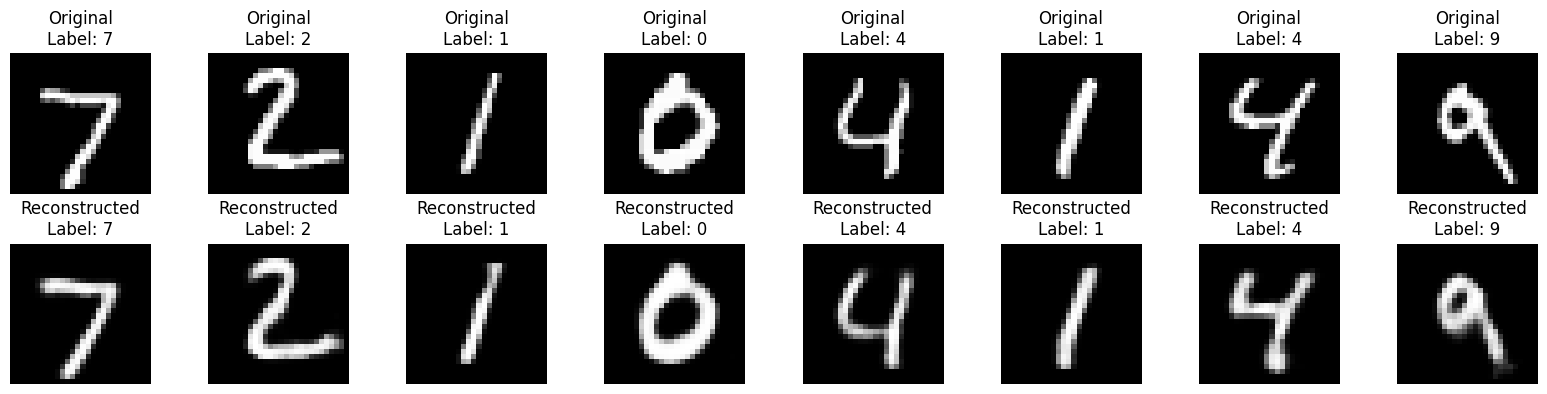

In [19]:
data_iter = iter(test_loader)
images, labels = next(data_iter)
images = images.to(device)
labels = labels.to(device)

# YOUR CODE HERE:
conditions = F.one_hot(labels, 10)

with torch.no_grad():
    recon_images, mu, logvar = model(images, conditions)

def plot_images(original, reconstructed, conditions, n=8):
    labels = conditions.argmax(dim=1)
    plt.figure(figsize=(16, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].cpu().view(28, 28), cmap='gray')
        plt.title(f"Original\nLabel: {labels[i].item()}")
        plt.axis("off")
        plt.subplot(2, n, i + n + 1)
        plt.imshow(reconstructed[i].cpu().view(28, 28), cmap='gray')
        plt.title(f"Reconstructed\nLabel: {labels[i].item()}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(images, recon_images, conditions, n=8)

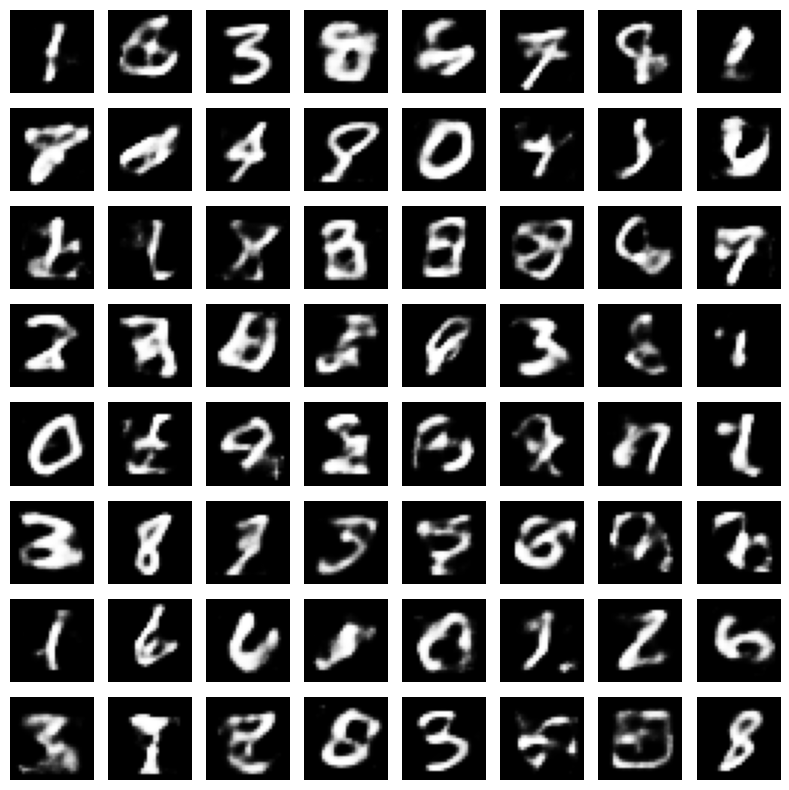

In [20]:
latent_dim = 20

# ---- Визуализация: Генерация новых изображений из латентного пространства ----
with torch.no_grad():
    # Выборка латентных векторов z из стандартного нормального распределения
    # YOUR CODE HERE:
    z = torch.randn(64, latent_dim)
    z = z.to(DEVICE)

    random_labels = torch.randint(0, 10, (64,)).to(device)
    conditions = F.one_hot(random_labels, 10)

    generated_images = model.decoder(z, conditions)

def plot_generated(images):
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        img = images[i].view(28,28).cpu().numpy()
        ax.imshow(img, cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plot_generated(generated_images)

### Улучшение модели

### Улучшения и особенности

1. **Увеличение глубины сети:**
   - В `SuperConditionalEncoder` и `SuperConditionalDecoder` добавлены дополнительные скрытые слои. Это позволяет модели лучше извлекать признаки из данных и улучшает ее способность к генерации.

2. **Использование Batch Normalization:**
   - В каждом скрытом слое добавлен слой нормализации (`BatchNorm1d`). Это помогает стабилизировать и ускорить процесс обучения, уменьшая внутреннюю ковариацию сдвигов в данных.

3. **Изменение размерности скрытых слоев:**
   - Размеры скрытых слоев были изменены для более оптимального извлечения признаков.

4. **Увеличение размерности латентного пространства:**
   - Размерность латентного пространства была увеличена до 40, что позволяет модели захватывать больше информации о данных и улучшает качество генерации.

In [21]:
class SuperConditionalEncoder(nn.Module):
    def __init__(self, input_dim=784, condition_dim=10, hidden_dim=588, latent_dim=20):
        super(SuperConditionalEncoder, self).__init__()
        self.hidden_layer = nn.Linear(input_dim + condition_dim, hidden_dim)
        self.norm = nn.BatchNorm1d(hidden_dim)
        self.hidden_layer2 = nn.Linear(hidden_dim, 392)
        self.norm2 = nn.BatchNorm1d(392)
        self.hidden_layer3 = nn.Linear(392, 196)
        self.norm3 = nn.BatchNorm1d(196)
        self.out_mean = nn.Linear(196, latent_dim)
        self.out_disp = nn.Linear(196, latent_dim)

    def forward(self, x, c):
        x = torch.cat([x, c], 1)
        x = F.relu(self.hidden_layer(x))
        x = self.norm(x)
        x = F.relu(self.hidden_layer2(x))
        x = self.norm2(x)
        x = F.relu(self.hidden_layer3(x))
        x = self.norm3(x)
        mu = self.out_mean(x)
        logvar = self.out_disp(x)
        return mu, logvar

In [22]:
class SuperConditionalDecoder(nn.Module):
    def __init__(self, latent_dim=20, condition_dim=10, hidden_dim=196, output_dim=784):
        super(SuperConditionalDecoder, self).__init__()
        self.hidden_layer = nn.Linear(latent_dim + condition_dim, 196)
        self.norm = nn.BatchNorm1d(hidden_dim)
        self.hidden_layer2 = nn.Linear(hidden_dim, 392)
        self.norm2 = nn.BatchNorm1d(392)
        self.hidden_layer3 = nn.Linear(392, 588)
        self.norm3 = nn.BatchNorm1d(588)
        self.out_layer = nn.Linear(588, output_dim)

    def forward(self, z, c):
        z = torch.cat([z, c], 1)
        hidden = F.relu(self.hidden_layer(z))
        hidden = self.norm(hidden)
        hidden = F.relu(self.hidden_layer2(hidden))
        hidden = self.norm2(hidden)
        hidden = F.relu(self.hidden_layer3(hidden))
        hidden = self.norm3(hidden)
        x_recon = torch.sigmoid(self.out_layer(hidden))
        return x_recon

In [23]:
class SuperConditionalVAE(nn.Module):
    def __init__(self, input_dim=784, condition_dim=10, hidden_dim=400, latent_dim=50):
        super(SuperConditionalVAE, self).__init__()
        self.encoder = SuperConditionalEncoder(input_dim, condition_dim, hidden_dim, latent_dim)
        self.decoder = SuperConditionalDecoder(latent_dim, condition_dim, 196, input_dim)

    def reparameterize(self, mu, logvar):
        std =  torch.exp(0.5 * logvar)
        epsilon = torch.rand_like(logvar).to(DEVICE)
        z = mu + std * epsilon
        return z

    def forward(self, x, c):
        mu, logvar = self.encoder(x, c)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z, c)
        return x_recon, mu, logvar

In [24]:
batch_size = 128
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = dset.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = dset.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [25]:
hidden_dim = 588 # размерность скрытого слоя
latent_dim = 40 # размерность латентного пространства

model = SuperConditionalVAE(input_dim=784, condition_dim=10, hidden_dim=hidden_dim, latent_dim=latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [26]:
num_epochs = 50 # Для получения более презентабельного результата используйте 50 и больше эпох
model.train()
for epoch in tqdm(range(1, num_epochs + 1)):
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        ## YOUR CODE HERE
        ## TODO: Переместите входные данные (data) на правильное устройство
        ## TODO: Перенесите метки классов (labels) на правильное устройство
        ## TODO: С помощью функции F.one_hot получите массив векторов - закодированных меток классов для вашего батча
        ## TODO: Обнулите градиенты
        ## TODO: Вычислите выходы энкодера (recon_batch, mu, logvar)
        ## TODO: Рассчитайте функцию потерь (loss)
        ## TODO: Выполните обратное распространение градиентов с учетом функции потерь
        ## TODO: Обновите общий loss, добавив текущий loss
        ## TODO: Выполните шаг оптимизатора
        labels = labels.to(DEVICE)
        data = data.to(DEVICE)
        conditions = F.one_hot(labels, 10)

        optimizer.zero_grad()

        x_recon, mean, log_var = model(data, conditions)
        loss = loss_function(x_recon, data, mean, log_var)

        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}')
    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 [0/60000 (0%)]	Loss: 585.567627
Epoch: 1 [12800/60000 (21%)]	Loss: 136.231613
Epoch: 1 [25600/60000 (43%)]	Loss: 112.692039
Epoch: 1 [38400/60000 (64%)]	Loss: 105.885887
Epoch: 1 [51200/60000 (85%)]	Loss: 104.905426


  2%|▏         | 1/50 [00:07<06:29,  7.95s/it]

====> Epoch: 1 Average loss: 153.4184
Epoch: 2 [0/60000 (0%)]	Loss: 98.161232
Epoch: 2 [12800/60000 (21%)]	Loss: 93.451530
Epoch: 2 [25600/60000 (43%)]	Loss: 93.551834
Epoch: 2 [38400/60000 (64%)]	Loss: 94.853203
Epoch: 2 [51200/60000 (85%)]	Loss: 91.126816


  4%|▍         | 2/50 [00:15<06:23,  7.99s/it]

====> Epoch: 2 Average loss: 93.5508
Epoch: 3 [0/60000 (0%)]	Loss: 92.150970
Epoch: 3 [12800/60000 (21%)]	Loss: 91.726440
Epoch: 3 [25600/60000 (43%)]	Loss: 92.864624
Epoch: 3 [38400/60000 (64%)]	Loss: 84.567200
Epoch: 3 [51200/60000 (85%)]	Loss: 87.817329


  6%|▌         | 3/50 [00:23<06:02,  7.71s/it]

====> Epoch: 3 Average loss: 88.5680
Epoch: 4 [0/60000 (0%)]	Loss: 85.062393
Epoch: 4 [12800/60000 (21%)]	Loss: 85.776924
Epoch: 4 [25600/60000 (43%)]	Loss: 88.913902
Epoch: 4 [38400/60000 (64%)]	Loss: 87.281403
Epoch: 4 [51200/60000 (85%)]	Loss: 85.476631


  8%|▊         | 4/50 [00:31<05:59,  7.82s/it]

====> Epoch: 4 Average loss: 85.8621
Epoch: 5 [0/60000 (0%)]	Loss: 84.722137
Epoch: 5 [12800/60000 (21%)]	Loss: 84.054123
Epoch: 5 [25600/60000 (43%)]	Loss: 82.818787
Epoch: 5 [38400/60000 (64%)]	Loss: 81.759682
Epoch: 5 [51200/60000 (85%)]	Loss: 81.548958


 10%|█         | 5/50 [00:39<05:55,  7.90s/it]

====> Epoch: 5 Average loss: 84.1733
Epoch: 6 [0/60000 (0%)]	Loss: 82.091072
Epoch: 6 [12800/60000 (21%)]	Loss: 83.152039
Epoch: 6 [25600/60000 (43%)]	Loss: 81.343002
Epoch: 6 [38400/60000 (64%)]	Loss: 83.207085
Epoch: 6 [51200/60000 (85%)]	Loss: 80.192810


 12%|█▏        | 6/50 [00:46<05:39,  7.72s/it]

====> Epoch: 6 Average loss: 82.8307
Epoch: 7 [0/60000 (0%)]	Loss: 83.710732
Epoch: 7 [12800/60000 (21%)]	Loss: 82.015793
Epoch: 7 [25600/60000 (43%)]	Loss: 78.084251
Epoch: 7 [38400/60000 (64%)]	Loss: 81.128799
Epoch: 7 [51200/60000 (85%)]	Loss: 79.452637


 14%|█▍        | 7/50 [00:54<05:35,  7.81s/it]

====> Epoch: 7 Average loss: 81.8594
Epoch: 8 [0/60000 (0%)]	Loss: 83.511383
Epoch: 8 [12800/60000 (21%)]	Loss: 81.705078
Epoch: 8 [25600/60000 (43%)]	Loss: 79.577766
Epoch: 8 [38400/60000 (64%)]	Loss: 81.251221
Epoch: 8 [51200/60000 (85%)]	Loss: 80.193367


 16%|█▌        | 8/50 [01:02<05:29,  7.85s/it]

====> Epoch: 8 Average loss: 81.0848
Epoch: 9 [0/60000 (0%)]	Loss: 79.885559
Epoch: 9 [12800/60000 (21%)]	Loss: 83.383965
Epoch: 9 [25600/60000 (43%)]	Loss: 83.281471
Epoch: 9 [38400/60000 (64%)]	Loss: 81.909790
Epoch: 9 [51200/60000 (85%)]	Loss: 77.380997


 18%|█▊        | 9/50 [01:10<05:15,  7.71s/it]

====> Epoch: 9 Average loss: 80.5471
Epoch: 10 [0/60000 (0%)]	Loss: 83.679024
Epoch: 10 [12800/60000 (21%)]	Loss: 80.377678
Epoch: 10 [25600/60000 (43%)]	Loss: 80.471642
Epoch: 10 [38400/60000 (64%)]	Loss: 82.802704
Epoch: 10 [51200/60000 (85%)]	Loss: 78.808792


 20%|██        | 10/50 [01:18<05:11,  7.78s/it]

====> Epoch: 10 Average loss: 79.9934
Epoch: 11 [0/60000 (0%)]	Loss: 75.683571
Epoch: 11 [12800/60000 (21%)]	Loss: 78.568176
Epoch: 11 [25600/60000 (43%)]	Loss: 79.699646
Epoch: 11 [38400/60000 (64%)]	Loss: 81.290169
Epoch: 11 [51200/60000 (85%)]	Loss: 78.267593


 22%|██▏       | 11/50 [01:25<05:02,  7.76s/it]

====> Epoch: 11 Average loss: 79.5507
Epoch: 12 [0/60000 (0%)]	Loss: 77.761185
Epoch: 12 [12800/60000 (21%)]	Loss: 82.358681
Epoch: 12 [25600/60000 (43%)]	Loss: 79.986267
Epoch: 12 [38400/60000 (64%)]	Loss: 77.475082
Epoch: 12 [51200/60000 (85%)]	Loss: 77.529358


 24%|██▍       | 12/50 [01:33<04:53,  7.71s/it]

====> Epoch: 12 Average loss: 79.1810
Epoch: 13 [0/60000 (0%)]	Loss: 79.350632
Epoch: 13 [12800/60000 (21%)]	Loss: 80.821182
Epoch: 13 [25600/60000 (43%)]	Loss: 77.854424
Epoch: 13 [38400/60000 (64%)]	Loss: 78.630974
Epoch: 13 [51200/60000 (85%)]	Loss: 78.773857


 26%|██▌       | 13/50 [01:41<04:48,  7.80s/it]

====> Epoch: 13 Average loss: 78.7496
Epoch: 14 [0/60000 (0%)]	Loss: 79.381538
Epoch: 14 [12800/60000 (21%)]	Loss: 78.934990
Epoch: 14 [25600/60000 (43%)]	Loss: 83.737007
Epoch: 14 [38400/60000 (64%)]	Loss: 81.785515
Epoch: 14 [51200/60000 (85%)]	Loss: 77.679337


 28%|██▊       | 14/50 [01:48<04:38,  7.73s/it]

====> Epoch: 14 Average loss: 78.5441
Epoch: 15 [0/60000 (0%)]	Loss: 79.529358
Epoch: 15 [12800/60000 (21%)]	Loss: 81.218491
Epoch: 15 [25600/60000 (43%)]	Loss: 77.820297
Epoch: 15 [38400/60000 (64%)]	Loss: 77.811485
Epoch: 15 [51200/60000 (85%)]	Loss: 78.686707


 30%|███       | 15/50 [01:56<04:30,  7.73s/it]

====> Epoch: 15 Average loss: 78.2557
Epoch: 16 [0/60000 (0%)]	Loss: 75.680923
Epoch: 16 [12800/60000 (21%)]	Loss: 83.691330
Epoch: 16 [25600/60000 (43%)]	Loss: 77.189476
Epoch: 16 [38400/60000 (64%)]	Loss: 76.008919
Epoch: 16 [51200/60000 (85%)]	Loss: 75.418770


 32%|███▏      | 16/50 [02:04<04:25,  7.81s/it]

====> Epoch: 16 Average loss: 77.9466
Epoch: 17 [0/60000 (0%)]	Loss: 74.152962
Epoch: 17 [12800/60000 (21%)]	Loss: 73.938103
Epoch: 17 [25600/60000 (43%)]	Loss: 81.343834
Epoch: 17 [38400/60000 (64%)]	Loss: 77.545853
Epoch: 17 [51200/60000 (85%)]	Loss: 77.884705


 34%|███▍      | 17/50 [02:11<04:13,  7.67s/it]

====> Epoch: 17 Average loss: 77.7927
Epoch: 18 [0/60000 (0%)]	Loss: 80.064522
Epoch: 18 [12800/60000 (21%)]	Loss: 78.051056
Epoch: 18 [25600/60000 (43%)]	Loss: 75.825378
Epoch: 18 [38400/60000 (64%)]	Loss: 76.238136
Epoch: 18 [51200/60000 (85%)]	Loss: 78.033058


 36%|███▌      | 18/50 [02:19<04:07,  7.75s/it]

====> Epoch: 18 Average loss: 77.5739
Epoch: 19 [0/60000 (0%)]	Loss: 77.208313
Epoch: 19 [12800/60000 (21%)]	Loss: 76.299545
Epoch: 19 [25600/60000 (43%)]	Loss: 77.470001
Epoch: 19 [38400/60000 (64%)]	Loss: 73.213348
Epoch: 19 [51200/60000 (85%)]	Loss: 77.006996


 38%|███▊      | 19/50 [02:27<04:01,  7.80s/it]

====> Epoch: 19 Average loss: 77.3231
Epoch: 20 [0/60000 (0%)]	Loss: 75.898468
Epoch: 20 [12800/60000 (21%)]	Loss: 75.425919
Epoch: 20 [25600/60000 (43%)]	Loss: 76.481171
Epoch: 20 [38400/60000 (64%)]	Loss: 77.268242
Epoch: 20 [51200/60000 (85%)]	Loss: 76.794701


 40%|████      | 20/50 [02:35<03:50,  7.68s/it]

====> Epoch: 20 Average loss: 77.0955
Epoch: 21 [0/60000 (0%)]	Loss: 74.690819
Epoch: 21 [12800/60000 (21%)]	Loss: 77.418068
Epoch: 21 [25600/60000 (43%)]	Loss: 74.417755
Epoch: 21 [38400/60000 (64%)]	Loss: 80.408485
Epoch: 21 [51200/60000 (85%)]	Loss: 76.825401


 42%|████▏     | 21/50 [02:43<03:44,  7.76s/it]

====> Epoch: 21 Average loss: 77.0069
Epoch: 22 [0/60000 (0%)]	Loss: 77.647186
Epoch: 22 [12800/60000 (21%)]	Loss: 74.371170
Epoch: 22 [25600/60000 (43%)]	Loss: 80.461082
Epoch: 22 [38400/60000 (64%)]	Loss: 79.025764
Epoch: 22 [51200/60000 (85%)]	Loss: 76.147568


 44%|████▍     | 22/50 [02:51<03:39,  7.84s/it]

====> Epoch: 22 Average loss: 76.8072
Epoch: 23 [0/60000 (0%)]	Loss: 77.172241
Epoch: 23 [12800/60000 (21%)]	Loss: 78.192574
Epoch: 23 [25600/60000 (43%)]	Loss: 77.506104
Epoch: 23 [38400/60000 (64%)]	Loss: 75.998512
Epoch: 23 [51200/60000 (85%)]	Loss: 78.631485


 46%|████▌     | 23/50 [02:58<03:28,  7.70s/it]

====> Epoch: 23 Average loss: 76.6782
Epoch: 24 [0/60000 (0%)]	Loss: 77.136177
Epoch: 24 [12800/60000 (21%)]	Loss: 76.886711
Epoch: 24 [25600/60000 (43%)]	Loss: 77.063950
Epoch: 24 [38400/60000 (64%)]	Loss: 74.983246
Epoch: 24 [51200/60000 (85%)]	Loss: 76.746948


 48%|████▊     | 24/50 [03:06<03:22,  7.78s/it]

====> Epoch: 24 Average loss: 76.5655
Epoch: 25 [0/60000 (0%)]	Loss: 74.251869
Epoch: 25 [12800/60000 (21%)]	Loss: 75.847328
Epoch: 25 [25600/60000 (43%)]	Loss: 76.925415
Epoch: 25 [38400/60000 (64%)]	Loss: 76.695900
Epoch: 25 [51200/60000 (85%)]	Loss: 74.074646


 50%|█████     | 25/50 [03:14<03:15,  7.82s/it]

====> Epoch: 25 Average loss: 76.3887
Epoch: 26 [0/60000 (0%)]	Loss: 74.338593
Epoch: 26 [12800/60000 (21%)]	Loss: 75.664856
Epoch: 26 [25600/60000 (43%)]	Loss: 75.459641
Epoch: 26 [38400/60000 (64%)]	Loss: 72.690834
Epoch: 26 [51200/60000 (85%)]	Loss: 74.451561


 52%|█████▏    | 26/50 [03:21<03:04,  7.70s/it]

====> Epoch: 26 Average loss: 76.2588
Epoch: 27 [0/60000 (0%)]	Loss: 77.669014
Epoch: 27 [12800/60000 (21%)]	Loss: 75.258499
Epoch: 27 [25600/60000 (43%)]	Loss: 76.780960
Epoch: 27 [38400/60000 (64%)]	Loss: 77.782730
Epoch: 27 [51200/60000 (85%)]	Loss: 74.190331


 54%|█████▍    | 27/50 [03:29<02:58,  7.78s/it]

====> Epoch: 27 Average loss: 76.1796
Epoch: 28 [0/60000 (0%)]	Loss: 79.388580
Epoch: 28 [12800/60000 (21%)]	Loss: 80.018883
Epoch: 28 [25600/60000 (43%)]	Loss: 76.315277
Epoch: 28 [38400/60000 (64%)]	Loss: 75.776009
Epoch: 28 [51200/60000 (85%)]	Loss: 76.695076


 56%|█████▌    | 28/50 [03:37<02:52,  7.83s/it]

====> Epoch: 28 Average loss: 76.1127
Epoch: 29 [0/60000 (0%)]	Loss: 74.456573
Epoch: 29 [12800/60000 (21%)]	Loss: 73.628052
Epoch: 29 [25600/60000 (43%)]	Loss: 77.332001
Epoch: 29 [38400/60000 (64%)]	Loss: 74.187080
Epoch: 29 [51200/60000 (85%)]	Loss: 75.989128


 58%|█████▊    | 29/50 [03:45<02:41,  7.69s/it]

====> Epoch: 29 Average loss: 75.9752
Epoch: 30 [0/60000 (0%)]	Loss: 80.764061
Epoch: 30 [12800/60000 (21%)]	Loss: 75.888794
Epoch: 30 [25600/60000 (43%)]	Loss: 75.435532
Epoch: 30 [38400/60000 (64%)]	Loss: 75.716095
Epoch: 30 [51200/60000 (85%)]	Loss: 74.414139


 60%|██████    | 30/50 [03:53<02:35,  7.78s/it]

====> Epoch: 30 Average loss: 75.8652
Epoch: 31 [0/60000 (0%)]	Loss: 77.395142
Epoch: 31 [12800/60000 (21%)]	Loss: 73.656601
Epoch: 31 [25600/60000 (43%)]	Loss: 78.647636
Epoch: 31 [38400/60000 (64%)]	Loss: 74.691536
Epoch: 31 [51200/60000 (85%)]	Loss: 76.891739


 62%|██████▏   | 31/50 [04:00<02:27,  7.79s/it]

====> Epoch: 31 Average loss: 75.7937
Epoch: 32 [0/60000 (0%)]	Loss: 75.344330
Epoch: 32 [12800/60000 (21%)]	Loss: 73.129333
Epoch: 32 [25600/60000 (43%)]	Loss: 76.818558
Epoch: 32 [38400/60000 (64%)]	Loss: 76.483948
Epoch: 32 [51200/60000 (85%)]	Loss: 74.975922


 64%|██████▍   | 32/50 [04:08<02:18,  7.71s/it]

====> Epoch: 32 Average loss: 75.6858
Epoch: 33 [0/60000 (0%)]	Loss: 75.251694
Epoch: 33 [12800/60000 (21%)]	Loss: 77.860069
Epoch: 33 [25600/60000 (43%)]	Loss: 75.512886
Epoch: 33 [38400/60000 (64%)]	Loss: 75.387314
Epoch: 33 [51200/60000 (85%)]	Loss: 73.794327


 66%|██████▌   | 33/50 [04:16<02:12,  7.80s/it]

====> Epoch: 33 Average loss: 75.6515
Epoch: 34 [0/60000 (0%)]	Loss: 77.764580
Epoch: 34 [12800/60000 (21%)]	Loss: 75.162178
Epoch: 34 [25600/60000 (43%)]	Loss: 74.477409
Epoch: 34 [38400/60000 (64%)]	Loss: 78.561150
Epoch: 34 [51200/60000 (85%)]	Loss: 74.736633


 68%|██████▊   | 34/50 [04:24<02:04,  7.77s/it]

====> Epoch: 34 Average loss: 75.4818
Epoch: 35 [0/60000 (0%)]	Loss: 75.668007
Epoch: 35 [12800/60000 (21%)]	Loss: 73.588249
Epoch: 35 [25600/60000 (43%)]	Loss: 77.024551
Epoch: 35 [38400/60000 (64%)]	Loss: 76.195496
Epoch: 35 [51200/60000 (85%)]	Loss: 73.954361


 70%|███████   | 35/50 [04:31<01:56,  7.75s/it]

====> Epoch: 35 Average loss: 75.3961
Epoch: 36 [0/60000 (0%)]	Loss: 74.404922
Epoch: 36 [12800/60000 (21%)]	Loss: 79.485420
Epoch: 36 [25600/60000 (43%)]	Loss: 75.875206
Epoch: 36 [38400/60000 (64%)]	Loss: 75.711357
Epoch: 36 [51200/60000 (85%)]	Loss: 78.080193


 72%|███████▏  | 36/50 [04:39<01:49,  7.81s/it]

====> Epoch: 36 Average loss: 75.3266
Epoch: 37 [0/60000 (0%)]	Loss: 76.639008
Epoch: 37 [12800/60000 (21%)]	Loss: 76.578629
Epoch: 37 [25600/60000 (43%)]	Loss: 73.361008
Epoch: 37 [38400/60000 (64%)]	Loss: 72.313744
Epoch: 37 [51200/60000 (85%)]	Loss: 77.201424


 74%|███████▍  | 37/50 [04:47<01:39,  7.67s/it]

====> Epoch: 37 Average loss: 75.3159
Epoch: 38 [0/60000 (0%)]	Loss: 74.031021
Epoch: 38 [12800/60000 (21%)]	Loss: 73.893982
Epoch: 38 [25600/60000 (43%)]	Loss: 72.805664
Epoch: 38 [38400/60000 (64%)]	Loss: 73.097649
Epoch: 38 [51200/60000 (85%)]	Loss: 76.160446


 76%|███████▌  | 38/50 [04:55<01:33,  7.76s/it]

====> Epoch: 38 Average loss: 75.1730
Epoch: 39 [0/60000 (0%)]	Loss: 74.809235
Epoch: 39 [12800/60000 (21%)]	Loss: 74.955040
Epoch: 39 [25600/60000 (43%)]	Loss: 78.886230
Epoch: 39 [38400/60000 (64%)]	Loss: 77.279671
Epoch: 39 [51200/60000 (85%)]	Loss: 73.311111


 78%|███████▊  | 39/50 [05:03<01:25,  7.81s/it]

====> Epoch: 39 Average loss: 75.1790
Epoch: 40 [0/60000 (0%)]	Loss: 73.117676
Epoch: 40 [12800/60000 (21%)]	Loss: 75.280846
Epoch: 40 [25600/60000 (43%)]	Loss: 72.942261
Epoch: 40 [38400/60000 (64%)]	Loss: 73.981979
Epoch: 40 [51200/60000 (85%)]	Loss: 75.415054


 80%|████████  | 40/50 [05:10<01:16,  7.68s/it]

====> Epoch: 40 Average loss: 75.0890
Epoch: 41 [0/60000 (0%)]	Loss: 75.954460
Epoch: 41 [12800/60000 (21%)]	Loss: 74.218895
Epoch: 41 [25600/60000 (43%)]	Loss: 74.237755
Epoch: 41 [38400/60000 (64%)]	Loss: 74.228340
Epoch: 41 [51200/60000 (85%)]	Loss: 75.027298


 82%|████████▏ | 41/50 [05:18<01:09,  7.76s/it]

====> Epoch: 41 Average loss: 75.0655
Epoch: 42 [0/60000 (0%)]	Loss: 75.863571
Epoch: 42 [12800/60000 (21%)]	Loss: 75.870239
Epoch: 42 [25600/60000 (43%)]	Loss: 74.254135
Epoch: 42 [38400/60000 (64%)]	Loss: 75.823120
Epoch: 42 [51200/60000 (85%)]	Loss: 76.633873


 84%|████████▍ | 42/50 [05:26<01:02,  7.82s/it]

====> Epoch: 42 Average loss: 75.0121
Epoch: 43 [0/60000 (0%)]	Loss: 72.707489
Epoch: 43 [12800/60000 (21%)]	Loss: 74.947487
Epoch: 43 [25600/60000 (43%)]	Loss: 75.200912
Epoch: 43 [38400/60000 (64%)]	Loss: 74.768143
Epoch: 43 [51200/60000 (85%)]	Loss: 71.291100


 86%|████████▌ | 43/50 [05:33<00:53,  7.69s/it]

====> Epoch: 43 Average loss: 74.9218
Epoch: 44 [0/60000 (0%)]	Loss: 73.681030
Epoch: 44 [12800/60000 (21%)]	Loss: 75.148926
Epoch: 44 [25600/60000 (43%)]	Loss: 75.756767
Epoch: 44 [38400/60000 (64%)]	Loss: 73.774498
Epoch: 44 [51200/60000 (85%)]	Loss: 76.792465


 88%|████████▊ | 44/50 [05:41<00:46,  7.78s/it]

====> Epoch: 44 Average loss: 74.8800
Epoch: 45 [0/60000 (0%)]	Loss: 73.143898
Epoch: 45 [12800/60000 (21%)]	Loss: 75.498222
Epoch: 45 [25600/60000 (43%)]	Loss: 76.783615
Epoch: 45 [38400/60000 (64%)]	Loss: 76.672935
Epoch: 45 [51200/60000 (85%)]	Loss: 75.964188


 90%|█████████ | 45/50 [05:49<00:39,  7.83s/it]

====> Epoch: 45 Average loss: 74.7517
Epoch: 46 [0/60000 (0%)]	Loss: 75.557205
Epoch: 46 [12800/60000 (21%)]	Loss: 77.510902
Epoch: 46 [25600/60000 (43%)]	Loss: 71.892181
Epoch: 46 [38400/60000 (64%)]	Loss: 72.717705
Epoch: 46 [51200/60000 (85%)]	Loss: 76.263138


 92%|█████████▏| 46/50 [05:56<00:30,  7.67s/it]

====> Epoch: 46 Average loss: 74.7465
Epoch: 47 [0/60000 (0%)]	Loss: 74.742516
Epoch: 47 [12800/60000 (21%)]	Loss: 73.473022
Epoch: 47 [25600/60000 (43%)]	Loss: 71.383713
Epoch: 47 [38400/60000 (64%)]	Loss: 74.980927
Epoch: 47 [51200/60000 (85%)]	Loss: 74.687683


 94%|█████████▍| 47/50 [06:04<00:23,  7.76s/it]

====> Epoch: 47 Average loss: 74.6954
Epoch: 48 [0/60000 (0%)]	Loss: 75.850746
Epoch: 48 [12800/60000 (21%)]	Loss: 75.912415
Epoch: 48 [25600/60000 (43%)]	Loss: 74.716103
Epoch: 48 [38400/60000 (64%)]	Loss: 73.161713
Epoch: 48 [51200/60000 (85%)]	Loss: 73.526520


 96%|█████████▌| 48/50 [06:12<00:15,  7.80s/it]

====> Epoch: 48 Average loss: 74.6623
Epoch: 49 [0/60000 (0%)]	Loss: 75.111961
Epoch: 49 [12800/60000 (21%)]	Loss: 75.242058
Epoch: 49 [25600/60000 (43%)]	Loss: 75.694931
Epoch: 49 [38400/60000 (64%)]	Loss: 74.624741
Epoch: 49 [51200/60000 (85%)]	Loss: 72.471794


 98%|█████████▊| 49/50 [06:20<00:07,  7.67s/it]

====> Epoch: 49 Average loss: 74.5882
Epoch: 50 [0/60000 (0%)]	Loss: 75.576500
Epoch: 50 [12800/60000 (21%)]	Loss: 73.027542
Epoch: 50 [25600/60000 (43%)]	Loss: 76.378418
Epoch: 50 [38400/60000 (64%)]	Loss: 75.996056
Epoch: 50 [51200/60000 (85%)]	Loss: 75.264320


100%|██████████| 50/50 [06:28<00:00,  7.76s/it]

====> Epoch: 50 Average loss: 74.5429


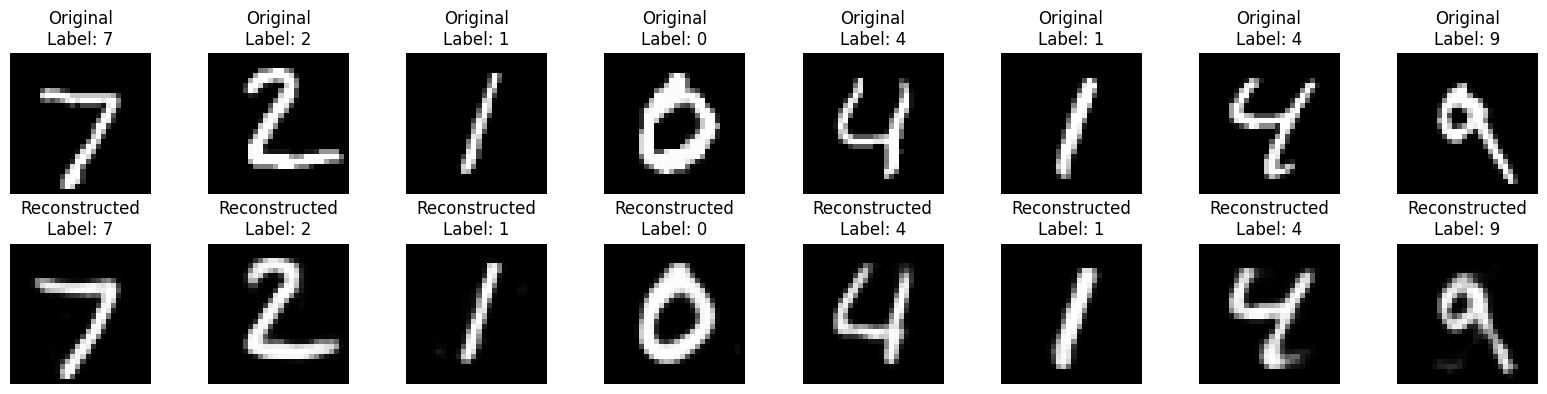

In [27]:
data_iter = iter(test_loader)
images, labels = next(data_iter)
images = images.to(device)
labels = labels.to(device)

# YOUR CODE HERE:
conditions = F.one_hot(labels, 10)

with torch.no_grad():
    recon_images, mu, logvar = model(images, conditions)

def plot_images(original, reconstructed, conditions, n=8):
    labels = conditions.argmax(dim=1)
    plt.figure(figsize=(16, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].cpu().view(28, 28), cmap='gray')
        plt.title(f"Original\nLabel: {labels[i].item()}")
        plt.axis("off")
        plt.subplot(2, n, i + n + 1)
        plt.imshow(reconstructed[i].cpu().view(28, 28), cmap='gray')
        plt.title(f"Reconstructed\nLabel: {labels[i].item()}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(images, recon_images, conditions, n=8)

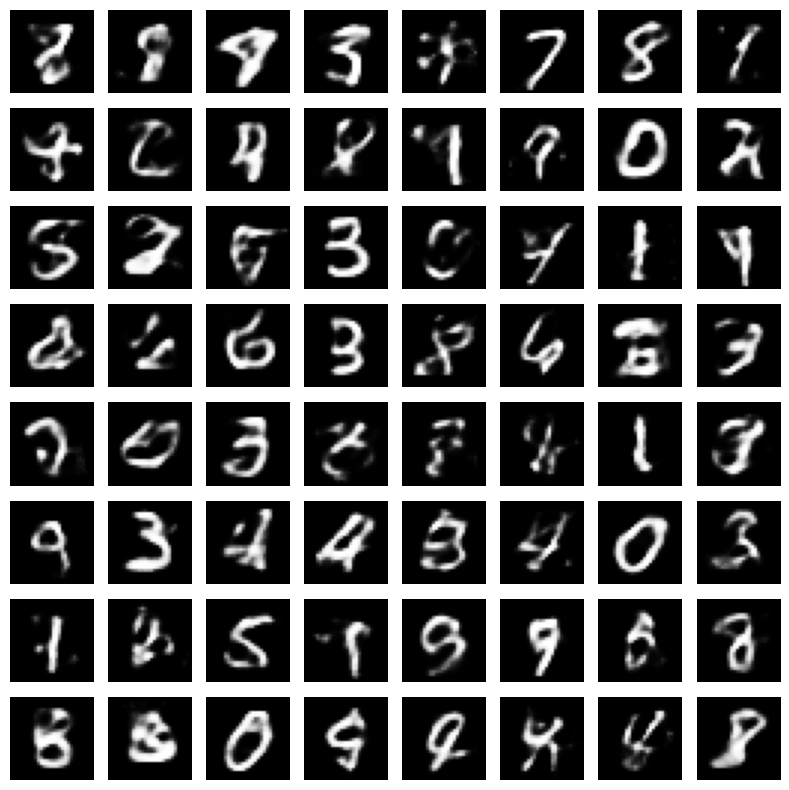

In [28]:
latent_dim = 40

# ---- Визуализация: Генерация новых изображений из латентного пространства ----
with torch.no_grad():
    # Выборка латентных векторов z из стандартного нормального распределения
    # YOUR CODE HERE:
    z = torch.randn(64, latent_dim)
    z = z.to(DEVICE)

    random_labels = torch.randint(0, 10, (64,)).to(device)
    conditions = F.one_hot(random_labels, 10)

    generated_images = model.decoder(z, conditions)

def plot_generated(images):
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        img = images[i].view(28,28).cpu().numpy()
        ax.imshow(img, cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plot_generated(generated_images)

# Задание 2 (GAN)

## GAN


In [29]:
class Generator(nn.Module):
    def __init__(self, noise_dim = 100, output_shape = (1, 28, 28)):
        super(Generator, self).__init__()
        self.output_shape = output_shape
        self.output_size = output_shape[0] * output_shape[1] * output_shape[2]
        self.fc = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, self.output_size),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.fc(z)
        img = img.view(img.size(0), *self.output_shape)
        return img

In [30]:
class Discriminator(nn.Module):
    def __init__(self, input_shape=(1, 28, 28)):
        super(Discriminator, self).__init__()
        self.input_size = input_shape[0] * input_shape[1] * input_shape[2]
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.input_size, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        result = self.fc(img)
        return result

In [31]:
batch_size = 128
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = dset.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = dset.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

criterion = nn.BCELoss()

generator = Generator().to(DEVICE)
discriminator = Discriminator().to(DEVICE)

optimizer_g = optim.Adam(generator.parameters(), lr=0.0005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0005)

In [32]:
from tqdm import tqdm

epochs = 50
for epoch in tqdm(range(epochs)):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(DEVICE)
        batch_size = real_images.size(0)

        # Создайте метки для реальных и фейковых изображений
        real_labels = torch.ones(batch_size, 1).to(DEVICE)
        fake_labels = torch.zeros(batch_size, 1).to(DEVICE)

        # Обучение дискриминатора
        # TODO: Обнулите градиенты дискриминатора
        optimizer_d.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        # TODO: Выполните обратное распространение ошибки


        noise = torch.randn(batch_size, 100).to(DEVICE)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        # TODO: Выполните обратное распространение ошибки для дискриминатора

        com_loss = d_loss_real + d_loss_fake
        com_loss.backward()

        # TODO: Выполните шаг оптимизатора дискриминатора
        optimizer_d.step()

        # Обучение генератора
        # TODO: Обнулите градиенты генератора
        optimizer_g.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()

        optimizer_g.step()

    # TODO: Выведите результаты текущей эпохи: сумму D Loss и значение G Loss
    print(f'Epoch [{epoch}/{epochs}], D Loss: {d_loss_real.item() + d_loss_fake.item():.4f}, G Loss: {g_loss.item():.4f}')


  2%|▏         | 1/50 [00:08<06:55,  8.48s/it]

Epoch [0/50], D Loss: 1.1774, G Loss: 1.5605


  4%|▍         | 2/50 [00:16<06:28,  8.10s/it]

Epoch [1/50], D Loss: 0.8130, G Loss: 1.8696


  6%|▌         | 3/50 [00:24<06:28,  8.27s/it]

Epoch [2/50], D Loss: 0.5404, G Loss: 2.3552


  8%|▊         | 4/50 [00:33<06:22,  8.32s/it]

Epoch [3/50], D Loss: 0.6877, G Loss: 3.2403


 10%|█         | 5/50 [00:40<06:05,  8.13s/it]

Epoch [4/50], D Loss: 1.7374, G Loss: 2.9173


 12%|█▏        | 6/50 [00:49<06:02,  8.24s/it]

Epoch [5/50], D Loss: 1.4248, G Loss: 4.1903


 14%|█▍        | 7/50 [00:57<05:56,  8.29s/it]

Epoch [6/50], D Loss: 1.1773, G Loss: 1.3401


 16%|█▌        | 8/50 [01:05<05:42,  8.17s/it]

Epoch [7/50], D Loss: 0.8887, G Loss: 2.2722


 18%|█▊        | 9/50 [01:14<05:37,  8.22s/it]

Epoch [8/50], D Loss: 0.6428, G Loss: 2.1815


 20%|██        | 10/50 [01:22<05:32,  8.31s/it]

Epoch [9/50], D Loss: 0.3825, G Loss: 2.8160


 22%|██▏       | 11/50 [01:30<05:20,  8.22s/it]

Epoch [10/50], D Loss: 0.2008, G Loss: 6.1841


 24%|██▍       | 12/50 [01:38<05:10,  8.17s/it]

Epoch [11/50], D Loss: 0.9492, G Loss: 3.6016


 26%|██▌       | 13/50 [01:47<05:05,  8.24s/it]

Epoch [12/50], D Loss: 0.4529, G Loss: 2.3033


 28%|██▊       | 14/50 [01:55<04:57,  8.26s/it]

Epoch [13/50], D Loss: 0.6995, G Loss: 3.8282


 30%|███       | 15/50 [02:03<04:43,  8.11s/it]

Epoch [14/50], D Loss: 0.2062, G Loss: 4.9681


 32%|███▏      | 16/50 [02:11<04:38,  8.18s/it]

Epoch [15/50], D Loss: 0.9903, G Loss: 7.0745


 34%|███▍      | 17/50 [02:19<04:31,  8.24s/it]

Epoch [16/50], D Loss: 0.6548, G Loss: 6.3099


 36%|███▌      | 18/50 [02:27<04:19,  8.12s/it]

Epoch [17/50], D Loss: 0.1236, G Loss: 3.1329


 38%|███▊      | 19/50 [02:36<04:15,  8.23s/it]

Epoch [18/50], D Loss: 0.5543, G Loss: 3.6648


 40%|████      | 20/50 [02:44<04:07,  8.26s/it]

Epoch [19/50], D Loss: 0.1550, G Loss: 8.8613


 42%|████▏     | 21/50 [02:52<03:55,  8.13s/it]

Epoch [20/50], D Loss: 3.3853, G Loss: 6.3417


 44%|████▍     | 22/50 [03:00<03:49,  8.21s/it]

Epoch [21/50], D Loss: 0.6336, G Loss: 2.5785


 46%|████▌     | 23/50 [03:09<03:42,  8.24s/it]

Epoch [22/50], D Loss: 0.1171, G Loss: 4.1225


 48%|████▊     | 24/50 [03:16<03:30,  8.10s/it]

Epoch [23/50], D Loss: 0.2836, G Loss: 5.2108


 50%|█████     | 25/50 [03:25<03:24,  8.18s/it]

Epoch [24/50], D Loss: 0.9943, G Loss: 3.4230


 52%|█████▏    | 26/50 [03:33<03:17,  8.23s/it]

Epoch [25/50], D Loss: 0.3140, G Loss: 10.3806


 54%|█████▍    | 27/50 [03:41<03:07,  8.16s/it]

Epoch [26/50], D Loss: 0.6163, G Loss: 3.2034


 56%|█████▌    | 28/50 [03:49<02:59,  8.18s/it]

Epoch [27/50], D Loss: 0.2606, G Loss: 7.3349


 58%|█████▊    | 29/50 [03:58<02:53,  8.25s/it]

Epoch [28/50], D Loss: 0.8018, G Loss: 8.7006


 60%|██████    | 30/50 [04:06<02:44,  8.21s/it]

Epoch [29/50], D Loss: 0.3805, G Loss: 6.8706


 62%|██████▏   | 31/50 [04:14<02:34,  8.15s/it]

Epoch [30/50], D Loss: 0.2664, G Loss: 7.3235


 64%|██████▍   | 32/50 [04:22<02:28,  8.23s/it]

Epoch [31/50], D Loss: 0.5370, G Loss: 6.3921


 66%|██████▌   | 33/50 [04:31<02:20,  8.27s/it]

Epoch [32/50], D Loss: 0.4691, G Loss: 5.9936


 68%|██████▊   | 34/50 [04:38<02:10,  8.14s/it]

Epoch [33/50], D Loss: 0.1804, G Loss: 6.4284


 70%|███████   | 35/50 [04:47<02:03,  8.24s/it]

Epoch [34/50], D Loss: 0.1860, G Loss: 12.6067


 72%|███████▏  | 36/50 [04:55<01:55,  8.28s/it]

Epoch [35/50], D Loss: 0.1953, G Loss: 6.1658


 74%|███████▍  | 37/50 [05:03<01:45,  8.15s/it]

Epoch [36/50], D Loss: 0.1383, G Loss: 22.8502


 76%|███████▌  | 38/50 [05:11<01:38,  8.21s/it]

Epoch [37/50], D Loss: 0.2704, G Loss: 12.3304


 78%|███████▊  | 39/50 [05:20<01:31,  8.28s/it]

Epoch [38/50], D Loss: 0.2494, G Loss: 7.5856


 80%|████████  | 40/50 [05:28<01:21,  8.13s/it]

Epoch [39/50], D Loss: 0.0715, G Loss: 11.2762


 82%|████████▏ | 41/50 [05:36<01:14,  8.26s/it]

Epoch [40/50], D Loss: 0.1430, G Loss: 10.1576


 84%|████████▍ | 42/50 [05:45<01:06,  8.31s/it]

Epoch [41/50], D Loss: 0.2184, G Loss: 5.8522


 86%|████████▌ | 43/50 [05:53<00:58,  8.39s/it]

Epoch [42/50], D Loss: 0.3592, G Loss: 5.3378


 88%|████████▊ | 44/50 [06:01<00:50,  8.34s/it]

Epoch [43/50], D Loss: 0.5808, G Loss: 4.0652


 90%|█████████ | 45/50 [06:10<00:41,  8.35s/it]

Epoch [44/50], D Loss: 0.1250, G Loss: 8.8455


 92%|█████████▏| 46/50 [06:18<00:33,  8.37s/it]

Epoch [45/50], D Loss: 0.1966, G Loss: 4.4134


 94%|█████████▍| 47/50 [06:26<00:24,  8.25s/it]

Epoch [46/50], D Loss: 0.3745, G Loss: 8.3674


 96%|█████████▌| 48/50 [06:35<00:16,  8.33s/it]

Epoch [47/50], D Loss: 0.0361, G Loss: 5.3454


 98%|█████████▊| 49/50 [06:43<00:08,  8.40s/it]

Epoch [48/50], D Loss: 0.1106, G Loss: 7.6637


100%|██████████| 50/50 [06:51<00:00,  8.23s/it]

Epoch [49/50], D Loss: 0.0205, G Loss: 6.7076


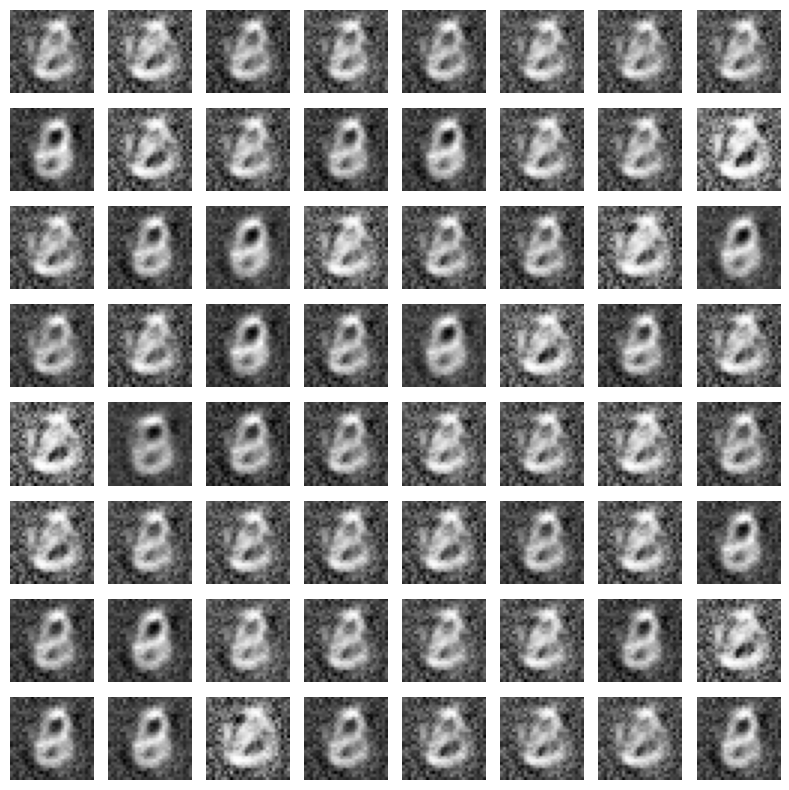

In [34]:
import matplotlib.pyplot as plt

# YOUR CODE HERE:
z = torch.randn(64, 100)
generated_images = generator(noise).cpu().detach()

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    img = generated_images[i].view(28,28).numpy()
    ax.imshow(img, cmap="gray")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Conditional GAN

In [35]:
class ConditionalGenerator(nn.Module):
    def __init__(self, noise_dim=100, num_classes=10, output_shape=(1, 28, 28)):
        super(ConditionalGenerator, self).__init__()
        self.output_shape = output_shape
        self.img_size = output_shape[0] * output_shape[1] * output_shape[2]
        self.fc = nn.Sequential(
            nn.Linear(noise_dim + num_classes, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, self.img_size),
            nn.Tanh()
        )

    def forward(self, z, c):
        x = torch.cat([z, c], 1)
        x = self.fc(x)
        x = x.view(x.size(0), *self.output_shape)
        return x

In [36]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_shape=(1, 28, 28), num_classes=10):
        super(ConditionalDiscriminator, self).__init__()
        self.input_shape = input_shape
        self.num_classes = num_classes

        self.img_dim = input_shape[0] * input_shape[1] * input_shape[2]

        input_dim = self.img_dim + num_classes

        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, c):
        img_flat = img.flatten(start_dim=1)
        x = torch.cat([img_flat, c], dim=1)
        x = self.fc(x)
        return x

In [37]:
batch_size = 128
lr = 0.0002
noise_dim = 100
num_classes = 10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [38]:
import torchvision
import torch.optim as optim

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

generator = ConditionalGenerator(noise_dim=noise_dim, num_classes=num_classes, output_shape=(1, 28, 28)).to(DEVICE)
discriminator = ConditionalDiscriminator(input_shape=(1, 28, 28), num_classes=num_classes).to(DEVICE)
criterion = nn.BCELoss()

optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

In [39]:
from tqdm import tqdm

epochs = 50
for epoch in tqdm(range(epochs)):
    for i, (real_images, labels) in enumerate(train_loader):
        labels = labels.to(DEVICE)
        real_images = real_images.to(DEVICE)
        batch_size = real_images.size(0)
        conditions = F.one_hot(labels, num_classes)

        # Создайте метки для реальных и фейковых изображений
        real_labels = torch.ones(batch_size, 1).to(DEVICE)
        fake_labels = torch.zeros(batch_size, 1).to(DEVICE)

        random_tensor = torch.randint(0, 10, (len(labels),)).to(DEVICE)
        conditions_random = F.one_hot(random_tensor, num_classes)

        optimizer_d.zero_grad()
        outputs = discriminator(real_images, conditions)
        d_loss_real = criterion(outputs, real_labels)
        # TODO: Выполните обратное распространение ошибки

        # удалить

        noise = torch.randn(batch_size, 100).to(DEVICE)


        # случайный лейблы генерить и переловать сюда и генератор

        fake_images = generator(noise, conditions_random)
        outputs = discriminator(fake_images.detach(), conditions_random)
        d_loss_fake = criterion(outputs, fake_labels)
        # TODO: Выполните обратное распространение ошибки для дискриминатора

        com_loss = d_loss_real + d_loss_fake

        # сложить лосы и backward
        com_loss.backward()

        # TODO: Выполните шаг оптимизатора дискриминатора
        optimizer_d.step()

        # Обучение генератора
        # TODO: Обнулите градиенты генератора
        optimizer_g.zero_grad()
        outputs = discriminator(fake_images, conditions_random)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()

        optimizer_g.step()

    # TODO: Выведите результаты текущей эпохи: сумму D Loss и значение G Loss
    print(f'Epoch [{epoch}/{epochs}], D Loss: {d_loss_real.item() + d_loss_fake.item():.4f}, G Loss: {g_loss.item():.4f}')

  2%|▏         | 1/50 [00:13<11:24, 13.97s/it]

Epoch [0/50], D Loss: 0.0464, G Loss: 8.9497


  4%|▍         | 2/50 [00:27<10:59, 13.73s/it]

Epoch [1/50], D Loss: 0.0034, G Loss: 8.0969


  6%|▌         | 3/50 [00:41<10:51, 13.86s/it]

Epoch [2/50], D Loss: 0.1165, G Loss: 20.1368


  8%|▊         | 4/50 [00:54<10:29, 13.69s/it]

Epoch [3/50], D Loss: 0.4032, G Loss: 2.8766


 10%|█         | 5/50 [01:08<10:15, 13.68s/it]

Epoch [4/50], D Loss: 1.9850, G Loss: 1.2287


 12%|█▏        | 6/50 [01:22<09:58, 13.59s/it]

Epoch [5/50], D Loss: 0.6350, G Loss: 2.1456


 14%|█▍        | 7/50 [01:35<09:42, 13.54s/it]

Epoch [6/50], D Loss: 0.1510, G Loss: 3.8308


 16%|█▌        | 8/50 [01:48<09:23, 13.41s/it]

Epoch [7/50], D Loss: 0.7341, G Loss: 4.4983


 18%|█▊        | 9/50 [02:02<09:10, 13.42s/it]

Epoch [8/50], D Loss: 0.0413, G Loss: 8.4707


 20%|██        | 10/50 [02:15<08:58, 13.47s/it]

Epoch [9/50], D Loss: 0.8139, G Loss: 2.8138


 22%|██▏       | 11/50 [02:29<08:53, 13.69s/it]

Epoch [10/50], D Loss: 0.1048, G Loss: 5.7842


 24%|██▍       | 12/50 [02:43<08:40, 13.71s/it]

Epoch [11/50], D Loss: 0.0991, G Loss: 4.1902


 26%|██▌       | 13/50 [02:57<08:27, 13.72s/it]

Epoch [12/50], D Loss: 0.1868, G Loss: 5.1098


 28%|██▊       | 14/50 [03:11<08:13, 13.72s/it]

Epoch [13/50], D Loss: 0.2982, G Loss: 10.8005


 30%|███       | 15/50 [03:24<07:57, 13.64s/it]

Epoch [14/50], D Loss: 0.5016, G Loss: 25.5327


 32%|███▏      | 16/50 [03:38<07:44, 13.66s/it]

Epoch [15/50], D Loss: 0.3821, G Loss: 9.5209


 34%|███▍      | 17/50 [03:51<07:30, 13.65s/it]

Epoch [16/50], D Loss: 0.2253, G Loss: 6.6483


 36%|███▌      | 18/50 [04:06<07:22, 13.82s/it]

Epoch [17/50], D Loss: 0.0658, G Loss: 6.4210


 38%|███▊      | 19/50 [04:19<07:05, 13.73s/it]

Epoch [18/50], D Loss: 0.1433, G Loss: 7.4889


 40%|████      | 20/50 [04:32<06:48, 13.62s/it]

Epoch [19/50], D Loss: 0.0848, G Loss: 6.3581


 42%|████▏     | 21/50 [04:46<06:34, 13.61s/it]

Epoch [20/50], D Loss: 0.0763, G Loss: 6.8981


 44%|████▍     | 22/50 [04:59<06:19, 13.55s/it]

Epoch [21/50], D Loss: 0.4519, G Loss: 4.8153


 46%|████▌     | 23/50 [05:13<06:05, 13.53s/it]

Epoch [22/50], D Loss: 0.5547, G Loss: 3.9245


 48%|████▊     | 24/50 [05:26<05:51, 13.51s/it]

Epoch [23/50], D Loss: 0.0343, G Loss: 6.9897


 50%|█████     | 25/50 [05:40<05:37, 13.51s/it]

Epoch [24/50], D Loss: 0.1678, G Loss: 4.0428


 52%|█████▏    | 26/50 [05:54<05:27, 13.65s/it]

Epoch [25/50], D Loss: 0.3000, G Loss: 4.1774


 54%|█████▍    | 27/50 [06:07<05:12, 13.59s/it]

Epoch [26/50], D Loss: 0.6214, G Loss: 12.4913


 56%|█████▌    | 28/50 [06:21<04:58, 13.55s/it]

Epoch [27/50], D Loss: 0.3514, G Loss: 4.1180


 58%|█████▊    | 29/50 [06:34<04:44, 13.53s/it]

Epoch [28/50], D Loss: 0.4125, G Loss: 3.6898


 60%|██████    | 30/50 [06:48<04:30, 13.53s/it]

Epoch [29/50], D Loss: 0.1306, G Loss: 5.0044


 62%|██████▏   | 31/50 [07:01<04:16, 13.48s/it]

Epoch [30/50], D Loss: 0.2861, G Loss: 4.9556


 64%|██████▍   | 32/50 [07:15<04:03, 13.52s/it]

Epoch [31/50], D Loss: 0.3830, G Loss: 5.5233


 66%|██████▌   | 33/50 [07:29<03:52, 13.68s/it]

Epoch [32/50], D Loss: 0.3414, G Loss: 6.9294


 68%|██████▊   | 34/50 [07:43<03:40, 13.78s/it]

Epoch [33/50], D Loss: 0.2409, G Loss: 4.0302


 70%|███████   | 35/50 [07:56<03:26, 13.74s/it]

Epoch [34/50], D Loss: 0.3670, G Loss: 4.2416


 72%|███████▏  | 36/50 [08:10<03:11, 13.69s/it]

Epoch [35/50], D Loss: 0.3345, G Loss: 4.9618


 74%|███████▍  | 37/50 [08:24<02:57, 13.67s/it]

Epoch [36/50], D Loss: 0.1911, G Loss: 5.0289


 76%|███████▌  | 38/50 [08:37<02:44, 13.68s/it]

Epoch [37/50], D Loss: 0.4809, G Loss: 3.5900


 78%|███████▊  | 39/50 [08:51<02:30, 13.65s/it]

Epoch [38/50], D Loss: 0.3562, G Loss: 3.4298


 80%|████████  | 40/50 [09:04<02:16, 13.62s/it]

Epoch [39/50], D Loss: 0.1731, G Loss: 4.0770


 82%|████████▏ | 41/50 [09:19<02:04, 13.81s/it]

Epoch [40/50], D Loss: 0.4593, G Loss: 3.3000


 84%|████████▍ | 42/50 [09:32<01:50, 13.75s/it]

Epoch [41/50], D Loss: 0.2918, G Loss: 3.7398


 86%|████████▌ | 43/50 [09:46<01:35, 13.67s/it]

Epoch [42/50], D Loss: 0.4043, G Loss: 5.0601


 88%|████████▊ | 44/50 [09:59<01:21, 13.57s/it]

Epoch [43/50], D Loss: 0.3874, G Loss: 4.1157


 90%|█████████ | 45/50 [10:13<01:07, 13.55s/it]

Epoch [44/50], D Loss: 0.2531, G Loss: 4.8443


 92%|█████████▏| 46/50 [10:26<00:54, 13.52s/it]

Epoch [45/50], D Loss: 0.3995, G Loss: 3.5063


 94%|█████████▍| 47/50 [10:40<00:40, 13.61s/it]

Epoch [46/50], D Loss: 0.3030, G Loss: 3.7008


 96%|█████████▌| 48/50 [10:54<00:27, 13.77s/it]

Epoch [47/50], D Loss: 0.1703, G Loss: 4.2467


 98%|█████████▊| 49/50 [11:08<00:13, 13.84s/it]

Epoch [48/50], D Loss: 0.3563, G Loss: 4.2801


100%|██████████| 50/50 [11:22<00:00, 13.65s/it]

Epoch [49/50], D Loss: 0.2099, G Loss: 4.9712


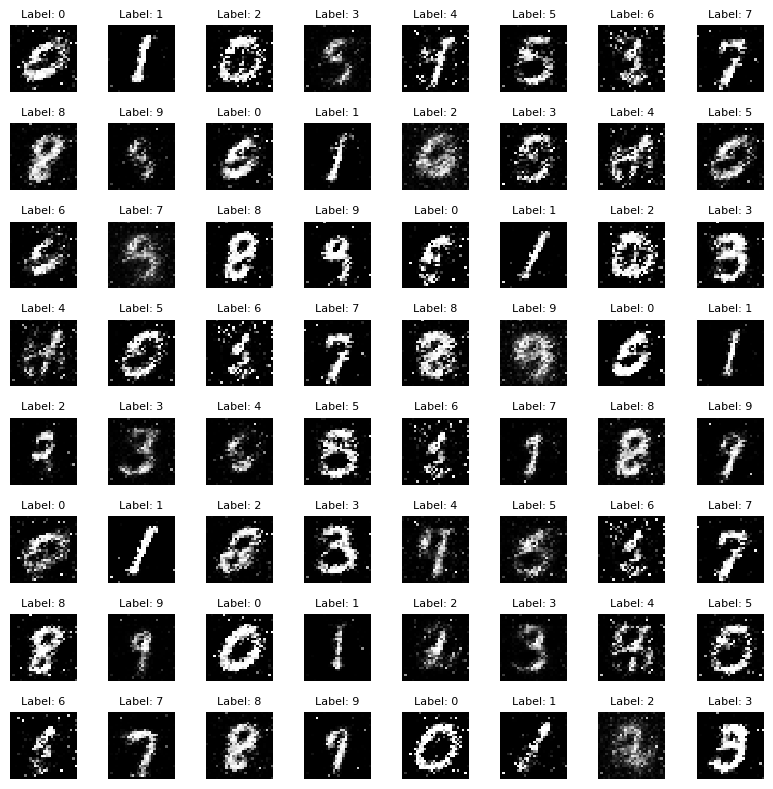

In [40]:
import matplotlib.pyplot as plt

with torch.no_grad():
    sample_noise = torch.randn(64, 100, device=DEVICE) # 64 образца случайного шума, каждый из которых имеет размерность noise_dim
    sample_labels = torch.arange(0, 64, device=DEVICE) % num_classes
    sample_labels_onehot = F.one_hot(sample_labels, num_classes)# С помощью функции F.one_hot получите массив векторов - закодированных меток классов для вашего батча
    fake_samples = generator(sample_noise, sample_labels_onehot)

    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        img = fake_samples[i].cpu().view(28, 28).numpy()
        ax.imshow(img, cmap="gray", interpolation="nearest")
        ax.set_title(f"Label: {sample_labels[i].item()}", fontsize=8)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Линейная интерполяция

In [ ]:
def interpolate_images(generator, first_dim, num_classes, class1, class2, num_interpolations=10):
  z1 = torch.randn(1, first_dim)
  z2 = torch.randn(1, first_dim)

  l1 = torch.zeros(1, num_classes)
  l1[0, class1] = 1  # Класс 0
  l2 = torch.zeros(1, num_classes)
  l2[0, class2] = 1  # Класс 1

  num_interpolations = 10
  interpolated_images = []

  for alpha in np.linspace(0, 1, num_interpolations):
      z = alpha * z1 + (1 - alpha) * z2
      l = alpha * l1 + (1 - alpha) * l2

      z = z.to(DEVICE)
      l = l.to(DEVICE)

      with torch.no_grad():
          generated_image = generator(z, l)

      interpolated_images.insert(0, generated_image.squeeze().cpu().numpy())

  return interpolated_images

def plot_interpolated_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img.reshape(28, 28), cmap='gray')
        axes[i].axis('off')
    plt.show()

interpolated_images = interpolate_images(model.decoder, latent_dim, num_classes, 5, 6)
plot_interpolated_images(interpolated_images)

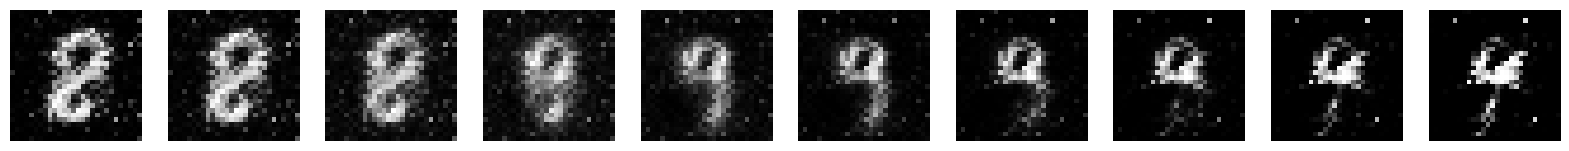

In [50]:
interpolated_images = interpolate_images(generator, noise_dim, num_classes, 8, 9)
plot_interpolated_images(interpolated_images)